# Design of Experiments

###  Observation studies and Experiments 

####  Observational study:
- Collect data in a way that does not directly interfere with how the data arise. 
- Only correlation can be inferred.

#### Experiment:
- Randomly assign subjects to various treatments
- Causation can be inferred

Relationships between using screens (mobile, tablet, laptop, etc) at bedtime and attention span.

- **Observational Study:** We sample 2 types of people from the population. Those who choose to use screens at bedtime and those who don't. Then we find the average attention span for the 2 groups of people and compare. Based on the observational study, even if we find a difference between the average attention span of these groups of people, we can't attribute this difference solely to using screens because there may be other variables that we didn't control for this study that could've contributed to the observed difference. For example, people who use screens at night might also be using screens for longer period during the day and their attention span might be affected by the daytime usage as well. 

- **Experiment:** We sample a group of people from the population and then we randomly assign these people into 2 groups: those who are asked to use screens at bedtime and those asked not to use them. The difference is that the decision to use or not use screens at bedtime is NOT left to the subject. Rather, it is imposed by the researcher. At the end, we compare the attention spans of the 2 groups. Such variables that might contribute to the outcome, called confounding variables, are most likely represented equally in the 2 groups due to random assignment. Therefore, if we find the difference between the 2 averages, we can indeed make a causal statement attributing this difference to bedtime screen usage. 


<img src="images/DOE_Study.JPG">

### Random sampling and random assignment

**Random sampling:** Occurs when the subjects are being selected for a study. If the subjects are selected randomly from the population, then the resulting sample is likely representative of the population and therefore the study's results can be generalizable to that population. 

** Random assignment:** Only occurs in experimental settings where subjects are being assigned to various treatments. Random assignments allow for causal conclusions. 

- **Random assignment + random sampling:** Causal and generalizable to the whole population. This is the ideal experiment but such studies are difficult to carry out, especially if the experimental units are humans, since it may be difficult to randomly sample people from the population and then impose treatments on them. 

- **Random assignment + no random sampling:** Causal but not generalizable. Experiments that rely on volunteers employ random assignment but not random sampling. These studies can be used to make causal conclusions but the conclusions but the conclusions can only be applied to the sample and the results cannot be generalized to the population. 

- **No random assignment + random sampling:** Not Causal but generalizable. A study that uses no random assignment but does use random sampling is your typical observational study. Results can only be used to make association statements but they can be generalized to the whole population.   

- **No random assignment + No random sampling:** Neither Causal nor generalizable. These studies can only be used to make non-causal association statements. This is NOT an ideal study. 

### Random sampling or random assignment:

One of the early studies linking smoking and lung cancer compared patients who are already hospitalized with lung cancer to similar patients without lung cancer (hospitalized for other reasons), and recorded whether each patient smoked. Then, proportions of smokers for patients with and without lung cancer were compared. 

**QUESTION:** Does this study employ random sampling and/or random assignment?

**ANSWER:** Neither random sampling nor random assignment. Random assignment is not employed because the conditions are not imposed on the patients by the people conducting the study. Random sampling is not employed because the study records the patients who are already hospitalized, so it wouldn't be appropriate to apply the findings back to the population as a whole. 


### Identify the scope of inference of study

Volunteers were recruited to participate in a study where they were asked to type 40 bits of trivia - for example, "an ostrich's eye is bigger than its brain" - into a computer. A randomly selected half of these subjects were told the information would be saved in the computer. The other half were told the items they typed would be erased. 

Then, the subjects were asked to remember these bits of trivia, and the number of bits of trivia each subject could correctly recall were recorded. It was found that the subjects were significantly more likely to remember information if they thought they would not be able to find it later. 

The results of the study **cannot** be generalized to all people and a causal link between believing information is stored and memory **can** be inferred based on these results. 

There is no random sampling since the subjects of the study were volunteers, so the results cannot be generalized to all people. However, due to random assignment, we are able to infer a causal link between the belief information is stored and the ability to recall that same information. 

### Simpson's Paradox

Often, when one mentions "a relationship between variables", we think of a relationship between just 2 variables (Explanatory variable X and Response variable Y). However, truly understanding the relationship between 2 variables might require considering other potentially related variables as well.  If we don't we might find ourselves in a Simpson's Paradox. 

Labelling variables as explanatory and response does not guarantee the relationship between the two is actually causal, even if there is an association identified. We use these labels only to keep track of which variable we suspect affects the other. 

We could study the relationship between 3 explanatory variables and a single response variable. This is often a more realistic scenario since most real world relationships are multivariable. 

For example, if we're interested in the relationship between calories consumed daily and heart health, we would probably also want to consider information on variables like age and fitness level of the person as well. **Not considering an important variable when studying a relationship can result in what we call a Simpson's Paradox, which illustrate the effect the ommission of an explanatory variable can on the measure of association between another explanatory variable and the response variable. **. 

In other words, the inclusion of a 3rd variable in the analysis can change the apparent relationship between the other 2 variables. 


In [1]:
library(dplyr)

Warning message:
"package 'dplyr' was built under R version 3.4.2"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [2]:
ucb_admit <- read.csv('datasets/UCB_ADMIT.csv')
cols <- c("Admit", "Gender", "Dept")
colnames(ucb_admit) <- cols
head(ucb_admit)

Admit,Gender,Dept
Admitted,Male,A
Admitted,Male,A
Admitted,Male,A
Admitted,Male,A
Admitted,Male,A
Admitted,Male,A


In [3]:
glimpse(ucb_admit)

Observations: 4,526
Variables: 3
$ Admit  <fct> Admitted, Admitted, Admitted, Admitted, Admitted, Admitted, ...
$ Gender <fct> Male, Male, Male, Male, Male, Male, Male, Male, Male, Male, ...
$ Dept   <fct> A, A, A, A, A, A, A, A, A, A, A, A, A, A, A, A, A, A, A, A, ...


### Number of males and females admitted

In [4]:
ucb_admission_counts <- count(ucb_admit, Gender, Admit)
ucb_admission_counts

Gender,Admit,n
Female,Admitted,557
Female,Rejected,1278
Male,Admitted,1198
Male,Rejected,1493


### Proportion of males admitted overall

Next we'll calculate the percentage of males and percentage of females admitted, by creating a new variable, called prop (short for proportion) based off of the counts calculated in the previous exercise and using the mutate() from the dplyr package.

Proportions for each row of the data frame we created in the previous exercise can be calculated as n / sum(n). Note that since the data are grouped by gender, sum(n) will be calculated for males and females separately.

In [5]:
ucb_admission_counts %>%
    group_by(Gender) %>%
    mutate(prop = n / sum(n)) %>%
    filter(Admit == "Admitted")

Gender,Admit,n,prop
Female,Admitted,557,0.3035422
Male,Admitted,1198,0.4451877


It looks like 44% of males were admitted versus only 30% of females. BUT there's more to this story. 

### Proportion of males admitted for each department

Finally we'll make a table similar to the one we constructed earlier, except we'll first group the data by department. The goal is to compare the proportions of male admitted students across departments.

Proportions for each row of the data frame we create can be calculated as n / sum(n). Note that since the data are grouped by department and gender, sum(n) will be calculated for males and females separately for each department.

In [6]:
ucb_admission_counts <- ucb_admit %>%
    group_by(Dept, Gender, Admit) %>%
    count()

ucb_admission_counts

Dept,Gender,Admit,n
A,Female,Admitted,89
A,Female,Rejected,19
A,Male,Admitted,512
A,Male,Rejected,313
B,Female,Admitted,17
B,Female,Rejected,8
B,Male,Admitted,353
B,Male,Rejected,207
C,Female,Admitted,202
C,Female,Rejected,391


In [7]:
ucb_admission_counts  %>%
  group_by(Dept, Gender) %>%
  mutate(prop = n/sum(n))

Dept,Gender,Admit,n,prop
A,Female,Admitted,89,0.82407407
A,Female,Rejected,19,0.17592593
A,Male,Admitted,512,0.62060606
A,Male,Rejected,313,0.37939394
B,Female,Admitted,17,0.68000000
B,Female,Rejected,8,0.32000000
B,Male,Admitted,353,0.63035714
B,Male,Rejected,207,0.36964286
C,Female,Admitted,202,0.34064081
C,Female,Rejected,391,0.65935919


### Gapminder dataset

In [8]:
library(gapminder)

Warning message:
"package 'gapminder' was built under R version 3.4.4"

In [9]:
head(gapminder)

country,continent,year,lifeExp,pop,gdpPercap
Afghanistan,Asia,1952,28.801,8425333,779.4453
Afghanistan,Asia,1957,30.332,9240934,820.8530
Afghanistan,Asia,1962,31.997,10267083,853.1007
Afghanistan,Asia,1967,34.020,11537966,836.1971
Afghanistan,Asia,1972,36.088,13079460,739.9811
Afghanistan,Asia,1977,38.438,14880372,786.1134


In [10]:
glimpse(gapminder)

Observations: 1,704
Variables: 6
$ country   <fct> Afghanistan, Afghanistan, Afghanistan, Afghanistan, Afgha...
$ continent <fct> Asia, Asia, Asia, Asia, Asia, Asia, Asia, Asia, Asia, Asi...
$ year      <int> 1952, 1957, 1962, 1967, 1972, 1977, 1982, 1987, 1992, 199...
$ lifeExp   <dbl> 28.801, 30.332, 31.997, 34.020, 36.088, 38.438, 39.854, 4...
$ pop       <int> 8425333, 9240934, 10267083, 11537966, 13079460, 14880372,...
$ gdpPercap <dbl> 779.4453, 820.8530, 853.1007, 836.1971, 739.9811, 786.113...


### Sampling strategies


Why do we sample in the first place? Why not try to collect data from the entire population of interest? You could try to take a census but it isn't easy. First, taking a census requires a lot more resources than collecting data from a sample of the population. Second, certain individuals in your population might be hard to locate or collect data from. If these individuals that are missed in the census are different from those in the rest of the population, the census data will be biased. 

For example, in the US census, illegal immigrants are often not recorded properly since they tend to be reluctant to fill out census forms with the concern that this information could be shared with immigrantion. However, these individuals might have characteristics different from the rest of the population and hence, not getting information from them might result in unreliable data from geographical regions with high concentrations of illegal immigrants. Lastly, populations are constantly changing. Even if you do have the required resources and manage to collect data from everyone in the population, your population will be different tomorrow and so the hard work required to collect such data may not pay off.

### Sample is natural

If you think about it, sampling is actually quite natural. Think about something you are cooking. We taste or in other words examine a small part of what we're cooking to get an idea about the dish as a whole. Afterall, we would never eat a whole pot of soup just to check its taste. When you taste a spoonful of soup and decide the spoonful you tasted isn't salty enough, what you're doing is simply explanatory analysis for the sample at hand. If you then generalize and conclude that your entire soup needs salt, that's making an inference. For your inference to be valid, the spoonful you tasted (your sample), needs to be representative of the entire pot (your population). If your spoonful comes only from the surface and the salt is collected at the bottom, what you tasted is probably not going to be representative of the whole pot. On the other hand, if you first stir the soup thoroughly before you taste, your spoonful will more likely be representative of the whole pot. 

Sampling data is a bit different than sampling soup though. Let's introduce a few commonly used sampling methods: 

* Simple random sampling
* Stratified sampling
* Cluster sampling
* Multistage sampling

### Simple random sampling
We randomly select cases from the population, such that each case is equally likely to be selected. This is similar to randomly drawing names from a hat. 

### Stratified sampling
We first divide the population into homogeneous groups called strata and then we randomly sample from within each stratum. For example, if we wanted to make sure that people from low, medium, and high socioeconomic status are equally represented in a study, we would first divide our population into 3 groups as such and then sample from within each group. 

### Cluster sampling
In cluster sampling, we divide the population into clusters, randomly sample a few clusters, and then sample all observations within these clusters. The clusters, unlike strata in stratified sampling, are heterogeneous within themselves and each cluster is similar to the others, such that we can get away with sampling from just a few of the clusters. 

### Multistage sampling
Multistage sampling adds another steps to cluster sampling. Just like in cluster sampling, we divide the population into clusters, randomly sample a few clusters, and then we randomly sample observations from within those clusters. 

...

Cluster and multistage sampling are often used from economical reasons. One might divide a city into geographic regions that are on average similar to each other and then sample randomly from a few randomly picked regions in order to avoid travelling to all regions. 

### Examples

### Sampling strategies, determine which...

A consulting company is planning a pilot study on marketing in Boston. They identify the zip codes that make up the greater Boston area, then sample 50 randomly selected addresses from each zip code and mail a coupon to these addresses. They then track whether the coupon was used in the following month.

What sampling strategy has this company used?

**Stratified sampling**

### Sampling strategies, choose worst...

A school district has requested a survey be conducted on the socioeconomic status of their students. Their budget only allows them to conduct the survey in some of the schools, hence they need to first sample a few schools.

Students living in this district generally attend a school in their neighborhood. The district is broken into many distinct and unique neighborhoods, some including large single-family homes and others with only low-income housing.

Which approach would likely be the least effective for selecting the schools where the survey will be conducted?

** Cluster sampling, where each cluster is a neighborhood. This sampling strategy would be a bad idea because each neighborhood has a unique socioeconomic status. A good study would collect information about every neighborhood **

### Sampling in R

In [11]:
library(openintro)
library(dplyr)

Please visit openintro.org for free statistics materials

Attaching package: 'openintro'

The following objects are masked from 'package:datasets':

    cars, trees



In [12]:
# load county data
data(county)

In [13]:
head(county)

name,state,pop2000,pop2010,fed_spend,poverty,homeownership,multiunit,income,med_income
Autauga County,Alabama,43671,54571,6.068095,10.6,77.5,7.2,24568,53255
Baldwin County,Alabama,140415,182265,6.139862,12.2,76.7,22.6,26469,50147
Barbour County,Alabama,29038,27457,8.752158,25.0,68.0,11.1,15875,33219
Bibb County,Alabama,20826,22915,7.122016,12.6,82.9,6.6,19918,41770
Blount County,Alabama,51024,57322,5.130910,13.4,82.0,3.7,21070,45549
Bullock County,Alabama,11714,10914,9.973062,25.3,76.9,9.9,20289,31602


In [14]:
summary(county)

                name           state         pop2000           pop2010       
 Washington County:  30   Texas   : 254   Min.   :     67   Min.   :     82  
 Jefferson County :  25   Georgia : 159   1st Qu.:  11210   1st Qu.:  11104  
 Franklin County  :  24   Virginia: 134   Median :  24608   Median :  25857  
 Jackson County   :  23   Kentucky: 120   Mean   :  89623   Mean   :  98233  
 Lincoln County   :  23   Missouri: 115   3rd Qu.:  61766   3rd Qu.:  66699  
 Madison County   :  19   Kansas  : 105   Max.   :9519338   Max.   :9818605  
 (Other)          :2999   (Other) :2256   NA's   :3                          
   fed_spend          poverty     homeownership     multiunit    
 Min.   :  0.000   Min.   : 0.0   Min.   : 0.00   Min.   : 0.00  
 1st Qu.:  6.964   1st Qu.:11.0   1st Qu.:69.50   1st Qu.: 6.10  
 Median :  8.669   Median :14.7   Median :74.60   Median : 9.70  
 Mean   :  9.991   Mean   :15.5   Mean   :73.26   Mean   :12.33  
 3rd Qu.: 10.857   3rd Qu.:19.0   3rd Qu.:78.4

In [15]:
glimpse(county)

Observations: 3,143
Variables: 10
$ name          <fct> Autauga County, Baldwin County, Barbour County, Bibb ...
$ state         <fct> Alabama, Alabama, Alabama, Alabama, Alabama, Alabama,...
$ pop2000       <dbl> 43671, 140415, 29038, 20826, 51024, 11714, 21399, 112...
$ pop2010       <dbl> 54571, 182265, 27457, 22915, 57322, 10914, 20947, 118...
$ fed_spend     <dbl> 6.068095, 6.139862, 8.752158, 7.122016, 5.130910, 9.9...
$ poverty       <dbl> 10.6, 12.2, 25.0, 12.6, 13.4, 25.3, 25.0, 19.5, 20.3,...
$ homeownership <dbl> 77.5, 76.7, 68.0, 82.9, 82.0, 76.9, 69.0, 70.7, 71.4,...
$ multiunit     <dbl> 7.2, 22.6, 11.1, 6.6, 3.7, 9.9, 13.7, 14.3, 8.7, 4.3,...
$ income        <dbl> 24568, 26469, 15875, 19918, 21070, 20289, 16916, 2057...
$ med_income    <dbl> 53255, 50147, 33219, 41770, 45549, 31602, 30659, 3840...


In [16]:
# since DC is not a state by definition, we're going to remove it

county_noDC <- county %>%
    filter(state != "District of Columbia") %>%
    droplevels()

# we'll drop levels for good measure
# dso the District of Columbia is removed completely
# from our dataframe. 

head(county_noDC)

name,state,pop2000,pop2010,fed_spend,poverty,homeownership,multiunit,income,med_income
Autauga County,Alabama,43671,54571,6.068095,10.6,77.5,7.2,24568,53255
Baldwin County,Alabama,140415,182265,6.139862,12.2,76.7,22.6,26469,50147
Barbour County,Alabama,29038,27457,8.752158,25.0,68.0,11.1,15875,33219
Bibb County,Alabama,20826,22915,7.122016,12.6,82.9,6.6,19918,41770
Blount County,Alabama,51024,57322,5.130910,13.4,82.0,3.7,21070,45549
Bullock County,Alabama,11714,10914,9.973062,25.3,76.9,9.9,20289,31602


Suppose our limited resources require that we collect data from only 150 of the over 3000 counties in the United States. One option is to take a simple random sample.

In [17]:
# simple random sample of 150 counties

county_srs <- county_noDC %>%
    sample_n(size = 150)

glimpse(county_srs)

Observations: 150
Variables: 10
$ name          <fct> Steele County, Transylvania County, Stark County, Eur...
$ state         <fct> Minnesota, North Carolina, Illinois, Nevada, Tennesse...
$ pop2000       <dbl> 33680, 29334, 6332, 1651, 130449, 2077, 3344, 11814, ...
$ pop2010       <dbl> 36576, 33090, 5994, 1987, 160645, 1717, 3476, 12191, ...
$ fed_spend     <dbl> 5.592930, 7.959021, 9.563564, 4.122798, 5.941542, 12....
$ poverty       <dbl> 7.5, 14.0, 11.2, 16.2, 10.1, 34.4, 46.0, 24.6, 13.9, ...
$ homeownership <dbl> 78.9, 76.6, 81.7, 73.1, 74.7, 71.0, 79.4, 71.5, 73.4,...
$ multiunit     <dbl> 15.4, 5.7, 9.3, 6.7, 15.1, 4.7, 4.9, 6.1, 4.8, 4.3, 1...
$ income        <dbl> 25062, 23939, 25311, 30306, 26014, 13955, 11485, 1504...
$ med_income    <dbl> 55321, 39408, 49195, 61400, 54916, 22188, 22647, 3328...


However, if we wanted to obtain equal number of counties from each state that is 3 counties per state, a simple random sample won't ensure that. We can confirm this by counting the number of counties per state...

In [18]:
county_srs %>% 
    group_by(state) %>%
    count() %>%
    head()

state,n
Alabama,1
Arkansas,2
California,4
Colorado,1
Delaware,1
Florida,3


If we instead want to sample 3 counties per state to make up our sample of 150 counties, we should use stratified sampling.

In [19]:
# stratified sample of 150 counties
# each state is a stratum

county_str <- county_noDC %>%
    group_by(state) %>%
    sample_n(size = 3)

glimpse(county_str)

Observations: 150
Variables: 10
$ name          <fct> Madison County, Clay County, Tallapoosa County, Yakut...
$ state         <fct> Alabama, Alabama, Alabama, Alaska, Alaska, Alaska, Ar...
$ pop2000       <dbl> 276700, 14254, 41475, 808, 82840, 6174, 155032, 17972...
$ pop2010       <dbl> 334811, 13932, 41616, 662, 97581, 7029, 200186, 37577...
$ fed_spend     <dbl> 29.802518, 8.982702, 8.643575, 15.096677, 16.850360, ...
$ poverty       <dbl> 12.0, 18.8, 17.5, 4.3, 7.6, 10.0, 16.1, 13.5, 20.3, 9...
$ homeownership <dbl> 70.4, 72.8, 73.3, 61.1, 59.8, 65.2, 71.5, 77.7, 75.4,...
$ multiunit     <dbl> 21.4, 11.2, 8.9, 12.4, 26.2, 17.3, 9.8, 6.3, 3.6, 7.8...
$ income        <dbl> 29918, 18332, 22542, 28576, 30395, 27657, 21523, 2171...
$ med_income    <dbl> 55851, 35595, 36904, 65750, 66598, 59596, 39785, 5131...


In [20]:
county_str %>% 
    group_by(state) %>%
    count() %>%
    head()

state,n
Alabama,3
Alaska,3
Arizona,3
Arkansas,3
California,3
Colorado,3


Simple random sampling would result in diferent amounts of data being sampled from each state. Stratified sampling ensured an equal number of states from each region. 

### Principles of experimental design

* Control: To control means to compare the treatment of interest to a control group. 

* Randomize: To randomize means to randomly assingly subjects to treatments. 

* Replicate: To replicate means to collect a sufficiently large sample within a study or to replicate the entire study. 

* Block: The goal of blocking is to account for potential effect of known or suspected confounding variables. We do this by first grouping subjects into blocks based on these variables and then randomizing them within each block to treatment groups. 


...

Let's discuss block a bit more

### Design a study (with blocking)

We would like to design an experiment to investigate whether students learn the R language in a traditional lecture based course or using an interactive online learning platform. 

Two courses that teach the exact same material are designed and the only difference between these courses is the method of delivery: traditional lecture or interactive online. 

We sample a group of students for our study that we will randomly assign to these 2 courses. But before we do so, we need to consider any potential confounding variables. It is suspected that previous programming experience might have an effect on how students learn in these two settings and we know that some of the students in our study have previous programming experience and some don't. Therefore, we decide to block for having previous programming experience. 

To do so, we divide our sample into two: those with programming experience and those without. Then we randomly assign individuals from each block into the 2 courses, ensuring that those with and without programming experience are equally represented in the 2 treatment groups. In this experiment, the explanatory variable is the course type lecture vs interactive online and the variable that we're blocking for is the previous programming experience. 

This way, if we find a difference in mastery of the R language between students in the 2 groups, we will be able to attribute it to the course-type and can be assured that the difference isn't due to previous programming experience since both those with and without such experience were equally represented in the 2 treatment groups. 

<img src="images/DOE_Blocking.JPG">

### Identifying components of a study

A researcher designs a study to test the effect of light and noise levels on exam performance of students. The researcher also believes that light and noise levels might have different effects on males and females, so she wants to make sure both genders are represented equally under different conditions.

**Answer:** There are 2 explanatory variables (light and noise), 1 blocking variable (gender), and 1 repsonse varaible (exam performance). 

### Experimental design terminology

**Explanatory variables** are conditions you can impose on the experimental units, while **blocking variables** are characteristics that the experimental units come with that you would like to control for.

### Connect blocking and stratifying

In random sampling, we use stratifying to control for a variable. In random assignment, we use blocking to achieve the same goal.

# Case study: Beauty in the classroom

Many college courses conclude by giving students the opportunity to annoymously evalaute both the course and the instructor. However, the use of these student evaluations as an indicator of course quality and teaching effectiveness is often criticized because the measures may reflect the influence of non-teaching related characteristics, such as the physical appearance of the instructor.

The data that we will be working with, which includes information on course evaluations as well as students' scoring of professors' physical attractiveness, was collected as part of a study conducted at the University of Texas - Austin. Let's analyze these data with the eventual goal of investigating whether instructors who are viewed to be better looking receive higher instructional ratings. 

In [21]:
load('datasets/evals.RData')

In [22]:
head(evals)

score,rank,ethnicity,gender,language,age,cls_perc_eval,cls_did_eval,cls_students,cls_level,...,cls_credits,bty_f1lower,bty_f1upper,bty_f2upper,bty_m1lower,bty_m1upper,bty_m2upper,bty_avg,pic_outfit,pic_color
4.7,tenure track,minority,female,english,36,55.81395,24,43,upper,...,multi credit,5,7,6,2,4,6,5,not formal,color
4.1,tenure track,minority,female,english,36,68.80000,86,125,upper,...,multi credit,5,7,6,2,4,6,5,not formal,color
3.9,tenure track,minority,female,english,36,60.80000,76,125,upper,...,multi credit,5,7,6,2,4,6,5,not formal,color
4.8,tenure track,minority,female,english,36,62.60163,77,123,upper,...,multi credit,5,7,6,2,4,6,5,not formal,color
4.6,tenured,not minority,male,english,59,85.00000,17,20,upper,...,multi credit,4,4,2,2,3,3,3,not formal,color
4.3,tenured,not minority,male,english,59,87.50000,35,40,upper,...,multi credit,4,4,2,2,3,3,3,not formal,color


In [23]:
summary(evals)

     score                 rank            ethnicity      gender   
 Min.   :2.300   teaching    :102   minority    : 64   female:195  
 1st Qu.:3.800   tenure track:108   not minority:399   male  :268  
 Median :4.300   tenured     :253                                  
 Mean   :4.175                                                     
 3rd Qu.:4.600                                                     
 Max.   :5.000                                                     
        language        age        cls_perc_eval     cls_did_eval   
 english    :435   Min.   :29.00   Min.   : 10.42   Min.   :  5.00  
 non-english: 28   1st Qu.:42.00   1st Qu.: 62.70   1st Qu.: 15.00  
                   Median :48.00   Median : 76.92   Median : 23.00  
                   Mean   :48.37   Mean   : 74.43   Mean   : 36.62  
                   3rd Qu.:57.00   3rd Qu.: 87.25   3rd Qu.: 40.00  
                   Max.   :73.00   Max.   :100.00   Max.   :380.00  
  cls_students    cls_level      cls_prof

In [24]:
glimpse(evals)

Observations: 463
Variables: 21
$ score         <dbl> 4.7, 4.1, 3.9, 4.8, 4.6, 4.3, 2.8, 4.1, 3.4, 4.5, 3.8...
$ rank          <fct> tenure track, tenure track, tenure track, tenure trac...
$ ethnicity     <fct> minority, minority, minority, minority, not minority,...
$ gender        <fct> female, female, female, female, male, male, male, mal...
$ language      <fct> english, english, english, english, english, english,...
$ age           <int> 36, 36, 36, 36, 59, 59, 59, 51, 51, 40, 40, 40, 40, 4...
$ cls_perc_eval <dbl> 55.81395, 68.80000, 60.80000, 62.60163, 85.00000, 87....
$ cls_did_eval  <int> 24, 86, 76, 77, 17, 35, 39, 55, 111, 40, 24, 24, 17, ...
$ cls_students  <int> 43, 125, 125, 123, 20, 40, 44, 55, 195, 46, 27, 25, 2...
$ cls_level     <fct> upper, upper, upper, upper, upper, upper, upper, uppe...
$ cls_profs     <fct> single, single, single, single, multiple, multiple, m...
$ cls_credits   <fct> multi credit, multi credit, multi credit, multi credi...
$ bty_f1lower   <int

#### This is an observational study

### Sampling / experimental attributes

The data from this study were gathered by randomly sampling classes.

### Variables in the data

* score: The average evaluation score of the professor for a given course. Scores range between 1 and 5 and 5 being an excellent evaluation. 

* rank: We are also given whether the professor is a teaching faculty, tenure track faculty, or tenured faculty.

* minority: Whether they are from a minority group or not

* gender: Whether they are male or female

* language: Whether the language of instruction at the university where they received their education was English or not. 

* Age: The age of the professor

We also have attribute about the classes themselves. 

* cls_perc_eval: Percent of students who completed the evaluations
* cls_did_eval: Number of students who completed the evals
* cls_students: Total number of students in the class
* cls_level: Level of the course
* cls_profs: Whether a single professor or multiple professors taught it
* cls_credits: Whether the course was a single credit or multi-credit course.

The attractiveness score of the professors in the sample were determined by six students who provided photos of the professors to rate. These students were comprised of 1 female who is lower level, that is first year or sophomore (indicated with f1lower), 2 female students who are upper level (indicated with f1upper and f2upper), one male student who is lower lowerl (m1lower) and 2 male students who are upper level (m1upper and m2upper). 1 indicates a low attractiveness score and a 10 indicates a high attractiveness score. 

* bty_avg: Average attractiveness score
* pic_outfit: Whether the professor was wearing a formal outfit in the photo
* pic_color: Whether the picture was black/white or in color. 

### Identify variable types

It's always useful to start your exploration of a dataset by identifying variable types. The results from this exercise will help you design appropriate visualizations and calculate useful summary statistics later in your analysis.

In [25]:
glimpse(evals)

Observations: 463
Variables: 21
$ score         <dbl> 4.7, 4.1, 3.9, 4.8, 4.6, 4.3, 2.8, 4.1, 3.4, 4.5, 3.8...
$ rank          <fct> tenure track, tenure track, tenure track, tenure trac...
$ ethnicity     <fct> minority, minority, minority, minority, not minority,...
$ gender        <fct> female, female, female, female, male, male, male, mal...
$ language      <fct> english, english, english, english, english, english,...
$ age           <int> 36, 36, 36, 36, 59, 59, 59, 51, 51, 40, 40, 40, 40, 4...
$ cls_perc_eval <dbl> 55.81395, 68.80000, 60.80000, 62.60163, 85.00000, 87....
$ cls_did_eval  <int> 24, 86, 76, 77, 17, 35, 39, 55, 111, 40, 24, 24, 17, ...
$ cls_students  <int> 43, 125, 125, 123, 20, 40, 44, 55, 195, 46, 27, 25, 2...
$ cls_level     <fct> upper, upper, upper, upper, upper, upper, upper, uppe...
$ cls_profs     <fct> single, single, single, single, multiple, multiple, m...
$ cls_credits   <fct> multi credit, multi credit, multi credit, multi credi...
$ bty_f1lower   <int

**Categorical variables:** "rank", "ethnicity", "gender", "language",           "cls_level", "cls_profs", "cls_credits", "pic_outfit", "pic_color"

### Recode a variable
The cls_students variable in evals tells you the number of students in the class. Suppose instead of the exact number of students, you're interested in whether the class is

* "small" (18 students or fewer),
* "midsize" (19 - 59 students), or
* "large" (60 students or more).

Recode the cls_students variable into a new variable, cls_type, using case_when(). This new variable should have three levels as described above. Save the resulting data frame (with the new variable) as evals.

In [26]:
# Recode cls_students as cls_type
evals <- evals %>%
  mutate(cls_type = case_when(
    cls_students <= 18 ~ "small",
    cls_students >= 19 & cls_students <= 59  ~ "midsize",
    cls_students >= 60 ~ "large"
    )
  )

In [27]:
glimpse(evals)

Observations: 463
Variables: 22
$ score         <dbl> 4.7, 4.1, 3.9, 4.8, 4.6, 4.3, 2.8, 4.1, 3.4, 4.5, 3.8...
$ rank          <fct> tenure track, tenure track, tenure track, tenure trac...
$ ethnicity     <fct> minority, minority, minority, minority, not minority,...
$ gender        <fct> female, female, female, female, male, male, male, mal...
$ language      <fct> english, english, english, english, english, english,...
$ age           <int> 36, 36, 36, 36, 59, 59, 59, 51, 51, 40, 40, 40, 40, 4...
$ cls_perc_eval <dbl> 55.81395, 68.80000, 60.80000, 62.60163, 85.00000, 87....
$ cls_did_eval  <int> 24, 86, 76, 77, 17, 35, 39, 55, 111, 40, 24, 24, 17, ...
$ cls_students  <int> 43, 125, 125, 123, 20, 40, 44, 55, 195, 46, 27, 25, 2...
$ cls_level     <fct> upper, upper, upper, upper, upper, upper, upper, uppe...
$ cls_profs     <fct> single, single, single, single, multiple, multiple, m...
$ cls_credits   <fct> multi credit, multi credit, multi credit, multi credi...
$ bty_f1lower   <int

In [28]:
head(evals)

score,rank,ethnicity,gender,language,age,cls_perc_eval,cls_did_eval,cls_students,cls_level,...,bty_f1lower,bty_f1upper,bty_f2upper,bty_m1lower,bty_m1upper,bty_m2upper,bty_avg,pic_outfit,pic_color,cls_type
4.7,tenure track,minority,female,english,36,55.81395,24,43,upper,...,5,7,6,2,4,6,5,not formal,color,midsize
4.1,tenure track,minority,female,english,36,68.80000,86,125,upper,...,5,7,6,2,4,6,5,not formal,color,large
3.9,tenure track,minority,female,english,36,60.80000,76,125,upper,...,5,7,6,2,4,6,5,not formal,color,large
4.8,tenure track,minority,female,english,36,62.60163,77,123,upper,...,5,7,6,2,4,6,5,not formal,color,large
4.6,tenured,not minority,male,english,59,85.00000,17,20,upper,...,4,4,2,2,3,3,3,not formal,color,midsize
4.3,tenured,not minority,male,english,59,87.50000,35,40,upper,...,4,4,2,2,3,3,3,not formal,color,midsize


### Create a scatterplot
The bty_avg variable shows the average beauty rating of the professor by the six students who were asked to rate the attractiveness of these faculty. The score variable shows the average professor evaluation score, with 1 being very unsatisfactory and 5 being excellent.

In [29]:
library(ggplot2)


Attaching package: 'ggplot2'

The following object is masked from 'package:openintro':

    diamonds



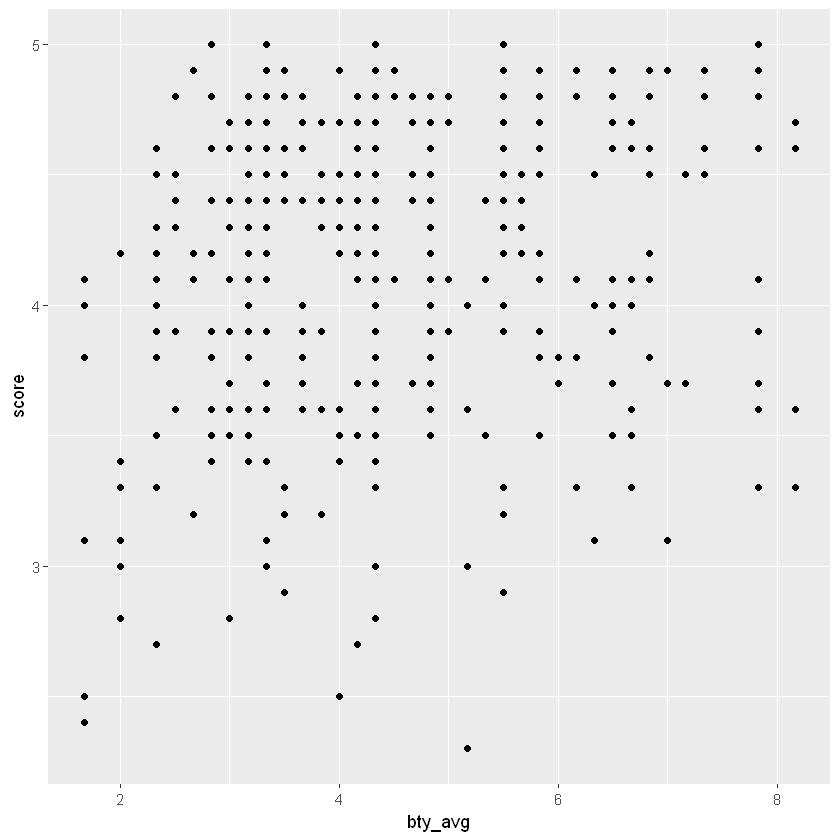

In [30]:
ggplot(evals, aes(x = bty_avg, y = score)) + geom_point()

### Create a scatterplot, with an added layer
Suppose you are interested in evaluating how the relationship between a professor's attractiveness and their evaluation score varies across different class types (small, midsize, and large).

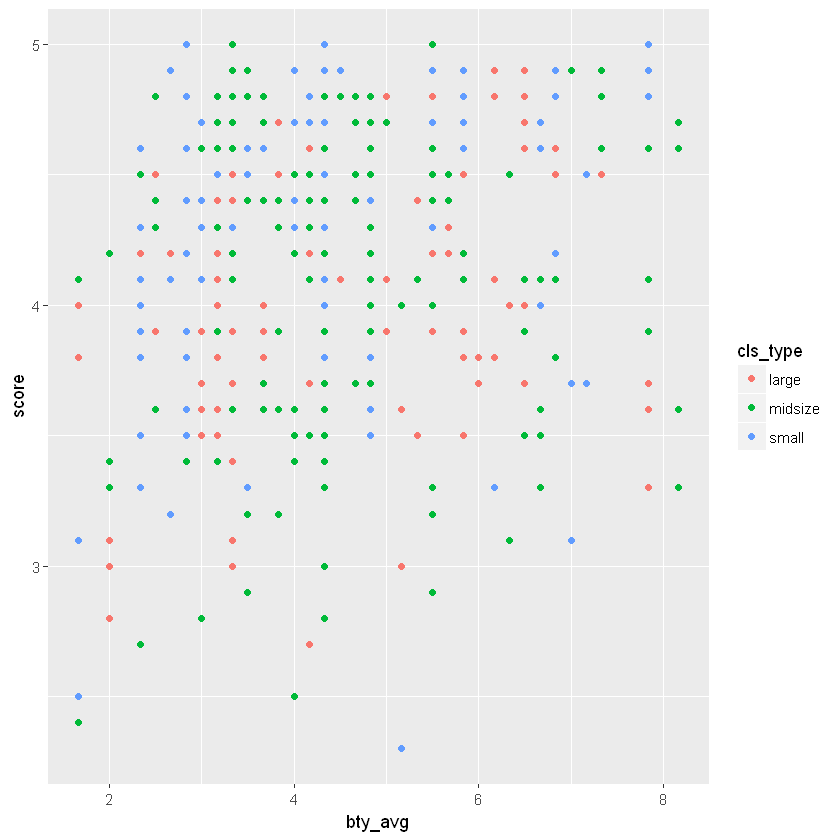

In [31]:
ggplot(evals, aes(x = bty_avg, y = score, color = cls_type)) +
    geom_point()

# Experimental Design Basics

An experiemnt starts with a question. The experiment involves collecting data with the question in mind and will include analyzing the data to seek an answer. 

The 3 level steps of an experiment are:

**1) Planning:** You start with your hypothesis - your question or even a series of series. What are you hoping to answer? What is the populatino of interest? What will your dependent variable be, the outcome, which hopefully can be measured to answer the question? What are your independent or explanatory variables - the variables you think may explain the dependent variable? 

**2) Design:** Design questions may naturally follow planning questions. Choosing a design might entail knowing you want to study different variables and the possible interaction effects of those variables, so you choose a factorial design. Then, if you dependent variable will be a yes/no answer, you know you're going to be dealing with some kind of logistic regression when you get to analysis. 

**3) Analysis**

### Three key components of an experiment

- Randomization
- Replication
- Blocking

All of these are done to access the variability across the study population. This means we're looking to explain the variation in an outcome by the different explanatory variables. In order to keep bias low, we need to randomize, create a replicable experiment, and sometimes block. 

Say we want to test who can score the most free throws in 5 minutes. We select as one group the HS basketball team and for the other, an english class. This is an incredibly biased experiment right out the gate. Any conclusions we draw will be based on our poor selection of groups and lack of randomization. 



### Randomization

Randomization is a key tenet of any experiment. Evenly distributes any variability in outcome due to outside factors across treatment groups. One example of randomization is double-blind medical trials, where neither the patient nor the researcher knows if the patient is recieving the treatment or not. The patient is randomized by a 3rd party into one of the two groups. 

### Replication

Replication is the idea that we need to repeat our experiment in order to assess what variability looks like. We certainly can't analyze data if we test a drug's efficacy on only one patient. Maybe it worked for them but how do we know if it will also work for other people? How can we properly generalize those results (we cant!). Our experiment must be designed to be easily replicable to get a wide range of outcomes. 

### Blocking

Block is a technique to help control variability by making treatment groups more alike. Inside of groups, differences will be minimal. A classic example is to test the effects of a drug on male and female patients, blocking by sex, to account for treatment variability, in this case, known differences in the drug reactions of amle and female bodies. 

In [32]:
data(ToothGrowth)

In [33]:
head(ToothGrowth)

len,supp,dose
4.2,VC,0.5
11.5,VC,0.5
7.3,VC,0.5
5.8,VC,0.5
6.4,VC,0.5
10.0,VC,0.5


In [34]:
mean(ToothGrowth$len)
median(ToothGrowth$len)

[1] 18.81333

[1] 19.25

Use t.test() to test if the len variable is not equal to 18 micrometers.

In [35]:
# Perform a two-sided t-test
t.test(x = ToothGrowth$len, 
       alternative = "two.sided", 
       mu = 18)


	One Sample t-test

data:  ToothGrowth$len
t = 0.82361, df = 59, p-value = 0.4135
alternative hypothesis: true mean is not equal to 18
95 percent confidence interval:
 16.83731 20.78936
sample estimates:
mean of x 
 18.81333 


It appears given the high p-value that we can conclude that we fail to reject the null hypothesis that the mean of len is not equal to 18, meaning we have evidence to believe it is around 18 micrometers.

### Randomization

Recall that randomization of subjects in an experiment helps spread any natural variability between subjects evenly across groups.

n the experiment that yielded the ToothGrowth dataset, guinea pigs were randomized to receive Vitamin C either through orange juice or ascorbic acid, indicated in the dataset by the supp variable. It's natural to wonder if there is a difference in tooth length by supplement type - a question that a t-test can also answer!

**Syntax: **
t.test(outcome ~ explanatory_variable, data = dataset)

Conduct the proper test to determine if there is a difference in tooth length based on supplement type

In [36]:
head(ToothGrowth)

len,supp,dose
4.2,VC,0.5
11.5,VC,0.5
7.3,VC,0.5
5.8,VC,0.5
6.4,VC,0.5
10.0,VC,0.5


In [37]:
library("broom")

In [38]:
# Perform a t-test
# h0 = no difference (difference is 0)
# h1 = there is a difference

(ToothGrowth_ttest <- t.test(len ~ supp, data = ToothGrowth))


	Welch Two Sample t-test

data:  len by supp
t = 1.9153, df = 55.309, p-value = 0.06063
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.1710156  7.5710156
sample estimates:
mean in group OJ mean in group VC 
        20.66333         16.96333 


In [39]:
# Tidy the t-test model object
tidy(ToothGrowth_ttest)

estimate,estimate1,estimate2,statistic,p.value,parameter,conf.low,conf.high,method,alternative
3.7,20.66333,16.96333,1.915268,0.06063451,55.30943,-0.1710156,7.571016,Welch Two Sample t-test,two.sided


It seems as though there is a difference in length between supplement types.

### Replication
Recall that replication means you need to repeat an experiment with an adequate number of subjects (sample size), usually to achieve an acceptable statistical power.

In [40]:
# Group by supp, dose, then examine 
# how many observations in ToothGrowth 
# there are by those groups

ToothGrowth %>% 
    group_by(supp, dose) %>% 
    summarise(n=n())

supp,dose,n
OJ,0.5,10
OJ,1.0,10
OJ,2.0,10
VC,0.5,10
VC,1.0,10
VC,2.0,10


The researchers seem to have tested each combination of supp and dose on 10 subjects each, which is low, but adequate for our experiments.

### Blocking
Though this is not true, suppose the supplement type is is actually a nuisance factor we'd like to control for by blocking, and we're actually interested in the effect of the dose of Vitamin C on guinea pig tooth growth.

We'll use the aov() function to examine this effect. aov() creates a linear regression model by calling lm() and examining results with anova() all in one function call. To use aov(), we'll still need functional notation, as with the randomization exercise, but this time the formula should be **len ~ dose + supp** to indicate we've blocked by supplement type.

In [41]:
ToothGrowth$dose <- as.factor(ToothGrowth$dose)

Make a boxplot to examine if the tooth length is different by dose. dose has been converted to a factor variable for you.

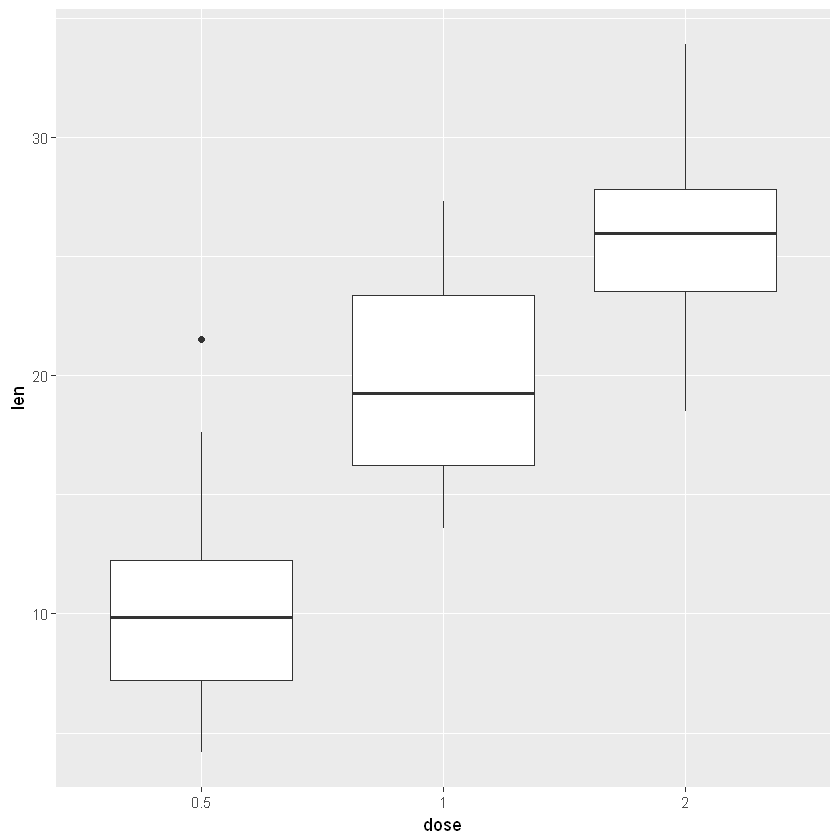

In [42]:
# Create a boxplot with geom_boxplot()
ggplot(ToothGrowth, aes(x = dose, y = len)) + 
    geom_boxplot()

Use aov() to detect the effect of dose and supp on len

In [43]:
# Create the ToothGrowth_aov model object
(ToothGrowth_aov <- aov(len ~ dose + supp, 
                            data = ToothGrowth))

Call:
   aov(formula = len ~ dose + supp, data = ToothGrowth)

Terms:
                    dose     supp Residuals
Sum of Squares  2426.434  205.350   820.425
Deg. of Freedom        2        1        56

Residual standard error: 3.82759
Estimated effects may be unbalanced

In [44]:
# Examine the model object with summary()
summary(ToothGrowth_aov)

            Df Sum Sq Mean Sq F value   Pr(>F)    
dose         2 2426.4  1213.2   82.81  < 2e-16 ***
supp         1  205.4   205.4   14.02 0.000429 ***
Residuals   56  820.4    14.7                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

In [45]:
tidy(ToothGrowth_aov)

term,df,sumsq,meansq,statistic,p.value
dose,2,2426.434,1213.21717,82.81093,1.871163e-17
supp,1,205.350,205.35000,14.01664,4.292793e-04
Residuals,56,820.425,14.65045,NA,NA


That's our first Randomized Complete Block Design (RCBD) experiment!

## Hypothesis Testing

A very important concept in experimental design is the formation and testing of a hypothesis or your central research question. For the tooth growth dataset that we worked on previously - the hypothesis concerned the effect of different doses and administration methods of Vitamin C on the length of tooth growth in the guinea pig. 

There are really 2 hypotheses that are grouped together - the null and the alternative hypothesis. 

**Null Hypothesis: **
- There is no change
- No difference between groups
- The mean, median, or observation = a number

For example, in the tooth growth experiment, the null hypothesis is: "There is no effect of Vitamin C dosage or administration type on guinea pig tooth growth". 

There's some nuance involved in the alternative hypothesis and its construction will help lead you to the correct test. 

**Alternative Hypothesis: **
- There is a chance
- Difference between groups
- Mean, median, or observation is >, <, or != to a number

If you're testing if the mean is only less than or greater than a value, it's a one-sided test. If you're testing that it's not equal to some number, that's a two-sided test. The one/two sided rule applies both to if you're testing one or two groups' means. Recall when we conducted a two-sided test to determine if the mean length of tooth growth was not equal to 18. The p-value was 0.4135, so at the 0.05 significance level, we fail to reject the null hypothesis. We have no strong evidence to suggest the mean is not equal to 18. 

Directly related to hypothesis testing is the idea of power. Power is the probability that the test correctly rejects the null hypothesis when the alternative hypothesis is true. One golden rule in statistics is to aim to have 80% power in your experiments, which you'll need an adequate sample size to achieve. 

Effect size, in the context of power analysis, is a standardized measure of the difference you're trying to detect - calculated as the difference between group means divided by the pooled standard deviation of the data. It's easier to detect a larger difference in means than a smaller one. 

Sample size is important in experiments. In general, as sample size increases, power increases. You've collected more information so you're more capable of examining your hypothesis. 

You need 2 of these 3 pieces to calculate the other: if you have a given power and effect size, you can generally calculate sample size. 

In [46]:
library(pwr)

Warning message:
"package 'pwr' was built under R version 3.4.4"

In [47]:
pwr.anova.test(k=3, # k = the number of groups in the comparison
                  n=20, # n = the number of observations per group
                  f=0.2, # f = effect size
                  sig.level=0.05, # significance level
                  power=NULL) # one of the params must be NULL so it can calculate the missing param. 


     Balanced one-way analysis of variance power calculation 

              k = 3
              n = 20
              f = 0.2
      sig.level = 0.05
          power = 0.2521043

NOTE: n is number in each group


A power of 0.25 is not great - we probably can't detect that small of an effect size with so few people in each group. 

### One sided vs. Two sided tests

We tested to see if the mean of the guinea pigs' teeth in ToothGrowth was not equal to 18 micrometers. That was an example of a two sided test: it looked to see if the mean of len is some other number on either side of 18.

We can also conduct a one sided test, explicitly checking to see if the mean is less than or greater than 18. Whether to use a one or two sided test usually follows from your research question. Want to know if an intervention causes longer tooth growth? One sided, greater than. Want to know if a drug causes the test group to lose more weight? One sided, less than. Simply want to know if there's a difference in test scores between two groups of students? Two sided test.

In [48]:
mean(ToothGrowth$len)

[1] 18.81333

In [49]:
# Test to see if the mean of the length variable of ToothGrowth is less than 18.

# H0 = mean is greater than or equal to 18
# H1= mean is less than 18

t.test(x = ToothGrowth$len,
       alternative = "less",
       mu = 18)


	One Sample t-test

data:  ToothGrowth$len
t = 0.82361, df = 59, p-value = 0.7933
alternative hypothesis: true mean is less than 18
95 percent confidence interval:
     -Inf 20.46358
sample estimates:
mean of x 
 18.81333 


In [50]:
# Test to see if the mean of the length variable of ToothGrowth is greater than 18

# H0 = mean is less than or equal to 18
# H1= mean is greater than 18

t.test(x = ToothGrowth$len,
       alternative = "greater",
       mu = 18)


	One Sample t-test

data:  ToothGrowth$len
t = 0.82361, df = 59, p-value = 0.2067
alternative hypothesis: true mean is greater than 18
95 percent confidence interval:
 17.16309      Inf
sample estimates:
mean of x 
 18.81333 


 It turns out the mean of len is actually very close to 18, so neither of these tests tells us much about the mean of tooth length.

In [51]:
# H0 = mean is equal to 18
# H1= mean is not equal to 18

t.test(x = ToothGrowth$len,
       alternative = "two.sided",
       mu = 18)


	One Sample t-test

data:  ToothGrowth$len
t = 0.82361, df = 59, p-value = 0.4135
alternative hypothesis: true mean is not equal to 18
95 percent confidence interval:
 16.83731 20.78936
sample estimates:
mean of x 
 18.81333 


### Power & Sample Size Calculations

One key part of designing an experiment is knowing the required sample size you'll need to be able to test your hypothesis. The pwr package provides a handy function, pwr.t.test(), which will calculate that for you, however you do need to know your desired significance level (often 0.05), if the test is one or two sided, if the data is from one sample, two samples, or paired, the effect size, and the power. Some of this information will be given to you or can be reasoned from the design.

A power or sample size calculation is usually different each time you conduct one, and the details of the calculation strongly depend on what kind of experiment you're designing and what your end goals are.

In [52]:
# Calculate power using an effect size of 0.35, a sample size of 100 in each group, and a significance level of 0.10.

pwr.t.test(n = 100, 
           d = 0.35,
           sig.level = 0.10,
           type = "two.sample", 
           alternative = "two.sided",
           power = NULL)


     Two-sample t test power calculation 

              n = 100
              d = 0.35
      sig.level = 0.1
          power = 0.7943532
    alternative = two.sided

NOTE: n is number in *each* group


In [53]:
# Calculate the sample size needed with an effect size of 0.25, a significance level of 0.05, and a power of 0.8.

pwr.t.test(n = NULL, 
           d = 0.25, 
           sig.level = 0.05, 
           type = "one.sample", alternative = "greater", 
           power = 0.80)


     One-sample t test power calculation 

              n = 100.2877
              d = 0.25
      sig.level = 0.05
          power = 0.8
    alternative = greater


The pwr package includes functions for calculating power and sample size for a variety of different tests, including ANOVA and linear models.

# Basic experiments

Let's explore 3 key concepts for experimental design

- ANOVA Test for 3+ groups
- Single and multiple factor experiments
- Importance of completely randomized design

So far, we've done some basic comparative experiments where we examine the difference in mean between 2 groups or 2 time periods of the same group using a T-Test. What do we do if we have more than 2 groups to compare? The answer is an ANOVA Test, which stands for Analysis of Variance. It allows us to compare the means of 3 or more groups. But there is a bit of a catch. We'll only know if one of the means is different from the others but not which means specifically. The test is still informative and can be implemented in R in a few different ways. 

In the first, you build a model object with the lm() or glm() functions and then call ANOVA on that model object. The second implementation, the aov() function, calls lm() internally and both builds the model object for you and conducts the anova test. 

A single factor experiment is like the model example from before - an experiment with one possible explanatory variable. 

In this example, model 1 is a linear regression model with some outcome variable (Y) and an explanatory variable (x) - a single factor. Ideally, a single factor experiement also has a completely randomized design which means there's some structure in your experiement. If applicacable, subjects are randomly assign to the treatment or control group. A classic textbook example of a single factor completely randomized design is testing cotton fabric strength. You can test the tensile strength of different cotton fabric in a random order and all that differs is the percent cotton in the fabric. 

A mutliple factor experiement expands on the single factor experiments and includes multiple explanatory factor variables that may be influencing the outcome variable. This might be an experiment that takes into account not just how much vitamin C a guinea pig was given but also the delivery method - a callback to our toothgrowth example. 

We'll be working with the Lending Club data. The outcome that we'll be most interested in is the amount funded. We'll test different explanatory variables that may influence the amount.

In [54]:
library("dplyr")
library("ggplot2")
library("broom")

In [55]:
lendingclub <- read.csv("datasets/lendclub.csv")

In [56]:
head(lendingclub)

member_id,loan_amnt,funded_amnt,term,int_rate,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,grade
55096114,11000,11000,36 months,12.69,10+ years,RENT,51000,Not Verified,Current,debt_consolidation,C
1555332,10000,10000,36 months,6.62,10+ years,MORTGAGE,40000,Verified,Fully Paid,debt_consolidation,A
1009151,13000,13000,60 months,10.99,3 years,MORTGAGE,78204,Not Verified,Fully Paid,home_improvement,B
69524202,5000,5000,36 months,12.05,10+ years,MORTGAGE,51000,Not Verified,Current,home_improvement,C
72128084,18000,18000,36 months,5.32,10+ years,MORTGAGE,96000,Not Verified,Current,credit_card,A
53906707,14000,14000,60 months,16.99,3 years,MORTGAGE,47000,Not Verified,Current,home_improvement,D


In [57]:
glimpse(lendingclub)

Observations: 1,500
Variables: 12
$ member_id           <int> 55096114, 1555332, 1009151, 69524202, 72128084,...
$ loan_amnt           <int> 11000, 10000, 13000, 5000, 18000, 14000, 8000, ...
$ funded_amnt         <int> 11000, 10000, 13000, 5000, 18000, 14000, 8000, ...
$ term                <fct> 36 months, 36 months, 60 months, 36 months, 36 ...
$ int_rate            <dbl> 12.69, 6.62, 10.99, 12.05, 5.32, 16.99, 13.11, ...
$ emp_length          <fct> 10+ years, 10+ years, 3 years, 10+ years, 10+ y...
$ home_ownership      <fct> RENT, MORTGAGE, MORTGAGE, MORTGAGE, MORTGAGE, M...
$ annual_inc          <dbl> 51000, 40000, 78204, 51000, 96000, 47000, 40000...
$ verification_status <fct> Not Verified, Verified, Not Verified, Not Verif...
$ loan_status         <fct> Current, Fully Paid, Fully Paid, Current, Curre...
$ purpose             <fct> debt_consolidation, debt_consolidation, home_im...
$ grade               <fct> C, A, B, C, A, D, C, A, D, B, C, B, E, C, A, C,...


In [58]:
# Find median loan_amnt, mean int_rate, and mean annual_inc with summarise()
lendingclub %>% 
    summarise(median(loan_amnt), mean(int_rate), mean(annual_inc))

median(loan_amnt),mean(int_rate),mean(annual_inc)
13000,13.31472,75736.03


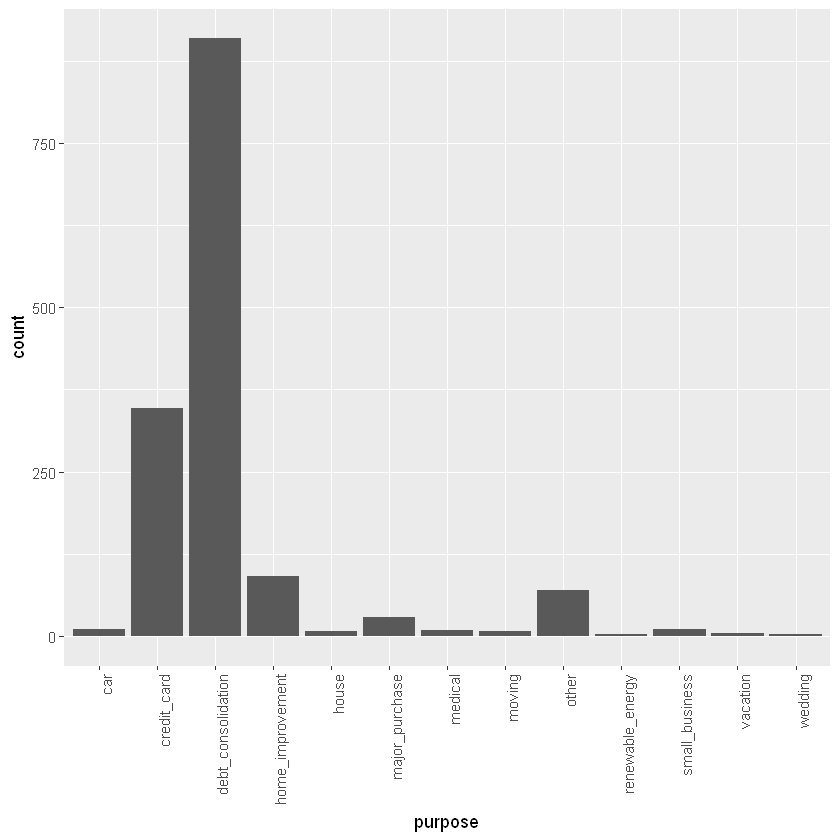

In [59]:
ggplot(data=lendingclub, aes(x = purpose)) + geom_bar() + 
    theme(axis.text.x=element_text(angle=90, hjust=1, vjust=1))

In [60]:
# Use recode() to create the new purpose_recode variable
lendingclub$purpose_recode <- lendingclub$purpose %>% recode( 
        "credit_card" = "debt_related", "debt_consolidation" = "debt_related", "medical" = "debt_related",
         "car" = "big_purchase", "major_purchase" = "big_purchase", "vacation" = "big_purchase",
         "moving" = "life_change", "small_business" = "life_change", "wedding" = "life_change",
         "house" = "home_related", "home_improvement" = "home_related")

In [61]:
head(lendingclub$purpose)

[1] debt_consolidation debt_consolidation home_improvement   home_improvement  
[5] credit_card        home_improvement  
13 Levels: car credit_card debt_consolidation home_improvement ... wedding

In [62]:
head(lendingclub$purpose_recode)

[1] debt_related debt_related home_related home_related debt_related
[6] home_related
6 Levels: big_purchase debt_related home_related life_change ... renewable_energy

### How does loan purpose affect amount funded?
We pared the purpose variable down to a more reasonable 5 categories and called it purpose_recode. As a data analyst or data scientist at Lending Club, we might want to design an experiment where we examine how the loan purpose influences the amount funded (the money actually issued to the applicant.)

Remember that for an ANOVA test, the null hypothesis will be that all of the mean funded amounts are equal across the levels of purpose_recode. The alternative hypothesis is that at least one level of purpose_recode has a different mean. We will not be sure which, however, without some post hoc analysis.

* H0 = All the mean funded amounts are equal across the levels of purpose_recode. 
* H1 = At least one level of purpose_recode has a different mean. 

In [63]:
# Build a linear regression model, stored as purpose_recode_model
purpose_recode_model <- lm(funded_amnt ~ purpose_recode, data = lendingclub)

In [64]:
# Look at results of purpose_recode_model
summary(purpose_recode_model)


Call:
lm(formula = funded_amnt ~ purpose_recode, data = lendingclub)

Residuals:
   Min     1Q Median     3Q    Max 
-14472  -6251  -1322   4678  25761 

Coefficients:
                               Estimate Std. Error t value Pr(>|t|)    
(Intercept)                      9888.1     1248.9   7.917 4.69e-15 ***
purpose_recodedebt_related       5433.5     1270.5   4.277 2.02e-05 ***
purpose_recodehome_related       4845.0     1501.0   3.228  0.00127 ** 
purpose_recodelife_change        4095.3     2197.2   1.864  0.06254 .  
purpose_recodeother              -649.3     1598.3  -0.406  0.68461    
purpose_recoderenewable_energy  -1796.4     4943.3  -0.363  0.71636    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 8284 on 1494 degrees of freedom
Multiple R-squared:  0.03473,	Adjusted R-squared:  0.0315 
F-statistic: 10.75 on 5 and 1494 DF,  p-value: 3.598e-10


In [65]:
# Get anova results and save as purpose_recode_anova
purpose_recode_anova <- anova(purpose_recode_model)

In [66]:
# Look at the class of purpose_recode_anova
summary(purpose_recode_anova)

       Df             Sum Sq             Mean Sq             F value     
 Min.   :   5.0   Min.   :3.689e+09   Min.   : 68629950   Min.   :10.75  
 1st Qu.: 377.2   1st Qu.:2.840e+10   1st Qu.:235911630   1st Qu.:10.75  
 Median : 749.5   Median :5.311e+10   Median :403193309   Median :10.75  
 Mean   : 749.5   Mean   :5.311e+10   Mean   :403193309   Mean   :10.75  
 3rd Qu.:1121.8   3rd Qu.:7.782e+10   3rd Qu.:570474988   3rd Qu.:10.75  
 Max.   :1494.0   Max.   :1.025e+11   Max.   :737756668   Max.   :10.75  
                                                          NA's   :1      
     Pr(>F) 
 Min.   :0  
 1st Qu.:0  
 Median :0  
 Mean   :0  
 3rd Qu.:0  
 Max.   :0  
 NA's   :1  

In [67]:
purpose_recode_anova

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
purpose_recode,5,3688783338,737756668,10.74978,3.597784e-10
Residuals,1494,102533145566,68629950,NA,NA


The ANOVA results are saved as a data frame, not a model object, which is nice in case you need to access results later. Loans aren't issued in a vacuum, however, and it's likely that more than just purpose influences the amount funded.

### Which loan purpose mean is different?
Before we examine other factors besides purpose_recode that might influence the amount of loan funded, let's examine which means of purpose_recode are different.

The result of the ANOVA was statistically significant with a very low p-value. This means we can reject the null hypothesis and accept the alternative hypothesis that at least one mean was different. But which one?

There are post hoc tests we can do to determine just that. Specifically, we should use Tukey's HSD (which stands for Honest Significant Difference...statistics is fun!) test with an object created with aov() (remember that this is the other function that conducts an ANOVA test, but also builds the linear model for you.)

In [68]:
# Use aov() to build purpose_recode_aov
purpose_recode_aov <- aov(funded_amnt ~ purpose_recode, data = lendingclub)

In [69]:
summary(purpose_recode_aov)

                 Df    Sum Sq   Mean Sq F value  Pr(>F)    
purpose_recode    5 3.689e+09 737756668   10.75 3.6e-10 ***
Residuals      1494 1.025e+11  68629950                    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

In [70]:
# Conduct Tukey's HSD test to create tukey_output
tukey_output <- TukeyHSD(purpose_recode_aov, conf.level = 0.95)

In [71]:
# Tidy tukey_output to make sense of the results
tidy(tukey_output)

term,comparison,estimate,conf.low,conf.high,adj.p.value
purpose_recode,debt_related-big_purchase,5433.5497,1808.4015,9058.698,2.905254e-04
purpose_recode,home_related-big_purchase,4845.0126,562.0345,9127.991,1.606975e-02
purpose_recode,life_change-big_purchase,4095.2652,-2174.3728,10364.903,4.250779e-01
purpose_recode,other-big_purchase,-649.3001,-5209.7754,3911.175,9.985823e-01
purpose_recode,renewable_energy-big_purchase,-1796.4015,-15901.7471,12308.944,9.991732e-01
purpose_recode,home_related-debt_related,-588.5371,-3055.5905,1878.516,9.840871e-01
purpose_recode,life_change-debt_related,-1338.2845,-6539.3240,3862.755,9.776960e-01
purpose_recode,other-debt_related,-6082.8498,-9005.2437,-3160.456,5.321224e-08
purpose_recode,renewable_energy-debt_related,-7229.9512,-20893.8901,6433.988,6.580011e-01
purpose_recode,life_change-home_related,-749.7475,-6428.9211,4929.426,9.990158e-01


The output gives the difference in means, confidence levels and the adjusted p-values for all possible pairs. The confidence levels and low p-values show significant between-group difference. The results can also be plotted.

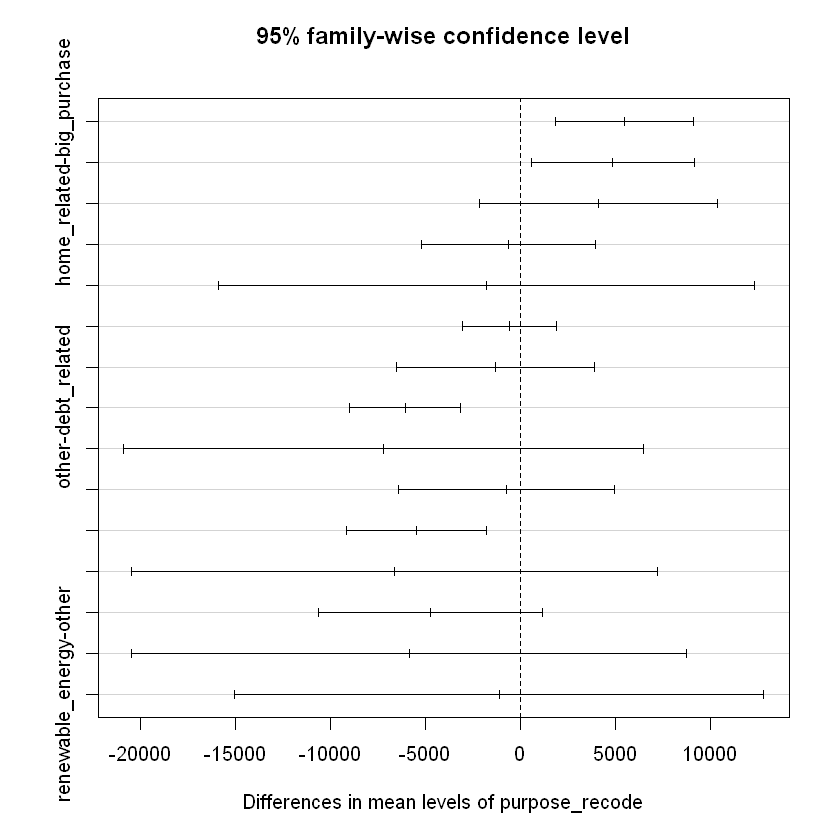

In [72]:
plot(tukey_output)

Now, let's look to see what other factors may be influencing the funded loan amount.

### Multiple Factor Experiments
We tested whether purpose of a loan affects loan amount funded and found that it does. However, we also know that it's unlikely that loans are funded based only on their intended purpose. It's more likely that the company is looking at a holistic picture of an applicant before they decide to issue a loan.

We can examine more than one explanatory factor in a multiple factor experiment. Like our experiments on ToothGrowth, an experimenter can try and control two (or more!) different factors and see how they affect the outcome. We're using open data, so we can't quite control the factors here (they're submitted as someone fills out their loan application), but let's look at how a few other factors affect loan amount funded.

In [73]:
# Use aov() to build purpose_emp_aov
purpose_emp_aov <- aov(funded_amnt ~ purpose_recode + emp_length, data = lendingclub)

In [74]:
# Call summary() to see the p-values
summary(purpose_emp_aov)

                 Df    Sum Sq   Mean Sq F value   Pr(>F)    
purpose_recode    5 3.689e+09 737756668  10.888 2.63e-10 ***
emp_length       11 2.044e+09 185843019   2.743  0.00161 ** 
Residuals      1483 1.005e+11  67760534                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

You could also perform Tukey's HSD test on this aov.

In [75]:
head(tidy(TukeyHSD(purpose_emp_aov, conf.level = 0.95)))

term,comparison,estimate,conf.low,conf.high,adj.p.value
purpose_recode,debt_related-big_purchase,5433.5497,1831.4019,9035.697,0.0002577867
purpose_recode,home_related-big_purchase,4845.0126,589.2087,9100.817,0.0150249873
purpose_recode,life_change-big_purchase,4095.2652,-2134.5939,10325.124,0.4175787052
purpose_recode,other-big_purchase,-649.3001,-5180.8406,3882.240,0.9985381187
purpose_recode,renewable_energy-big_purchase,-1796.4015,-15812.2532,12219.450,0.9991472224
purpose_recode,home_related-debt_related,-588.5371,-3039.9379,1862.864,0.9836241017


## Model validation

Previously, we built a few linear models with lm() and aov() functions plus an anova table with the anova() function. We also did some premodelling EDA but we skipped something pretty crucial. 

Before modelling, you should do some EDA of your data. Let's say lending club asked you to examine the funded amount amount of the loan based on the verification status. Verification Status is a variable that indicates if the applicants' reported income was verified by Lending Club, another source, or not verified. We looked at the mean and variance in the last lesson. We didn't group by the purpose variable because it hadn't been recoded yet. 

In [76]:
lendingclub %>% 
    summarise(median(loan_amnt), 
                mean(int_rate), 
                 mean(annual_inc))

median(loan_amnt),mean(int_rate),mean(annual_inc)
13000,13.31472,75736.03


In [77]:
lendingclub %>%
    group_by(verification_status) %>%
    summarise(mean(funded_amnt), 
                 var(funded_amnt))

verification_status,mean(funded_amnt),var(funded_amnt)
Not Verified,11018.39,33994991
Source Verified,15154.88,70477801
Verified,17561.88,82211449


The above code gives us the median and variance of funded amount. There's more though!

While a boxplot is the kind of graph that non data scientists don't always respond to, the biggest misconception is that people think the median is the mean. It's often nice to build one for yourself to see the interquartile range of the variable. 



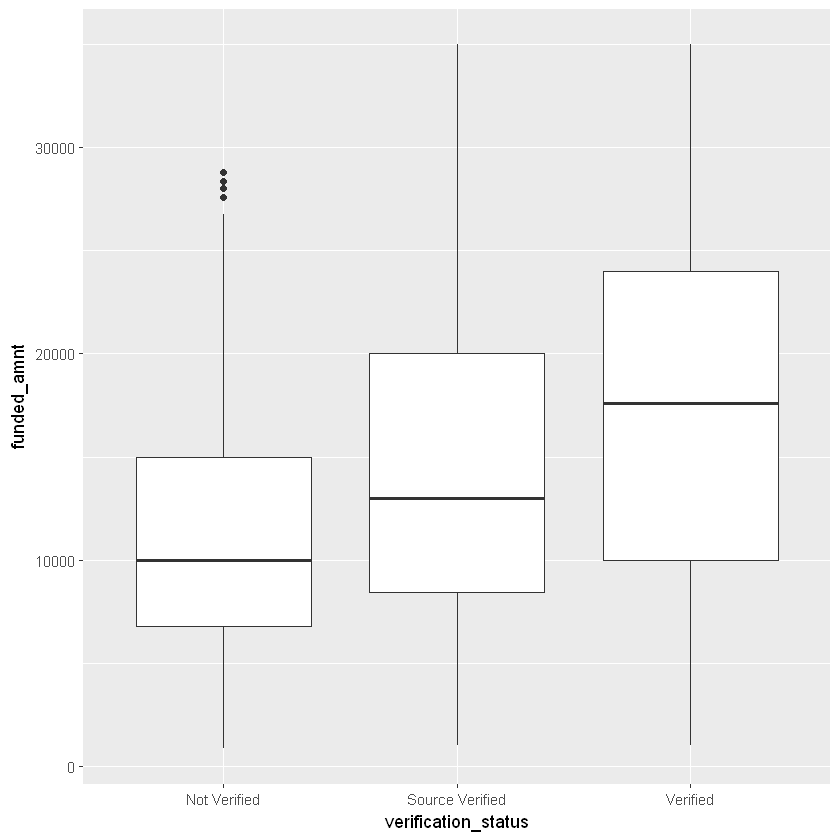

In [78]:
ggplot(data = lendingclub, aes(x = verification_status, y = funded_amnt)) + 
    geom_boxplot()

The boxplot here shows no obvious outliers, though there are a few extreme observations on the "not verified" category. "Sourced Verified" and "Verified" has very similar distributions. This is very good and you can continue modelling. 

Let's skip ahead and say that you built the ANOVA model for funded amount by verification status and found that the mean funded amount for different verficiation statuses are significantly different. Furthermore, you did Tukey's HSD test and found that only "Verified" compared to "Source Verified" is not significantly different from one another. 

Now what? 

Now comes post-modelling model validation. This can include looking at different plots, such as a residual or residual versus fitted values plot or a qqplot, testing ANOVA assumptions such as the homogeneity, or the sameness of variances, or even trying non-parametric alternative to ANOVA, such as a the Kruskal-Wallis test. 

<img src="images/post-modelling-validation.JPG">

Non-parametric just means that the test does not assume that the data came from a particular statistical distribution, the way that ANOVA tests assume data is normally distributed. The residuals vs fitted plot will show if the model is a good fit (if there is a similar scatter pattern for each level of the group variable). If we saw a different pattern for each level, we could begin to think that there's heteroscedasticity in the residuals, and that the model may not be a great fit. 

The normal QQ plot should, ideally, show the points scattered around the regression line. One assumption of ANOVA and linear models is that the residuals are normally distributed. If that proves not to be true, your model might not be a good fit, and you may need to try adding explanatory variables or try different modelling techniques. 

The other 2 graphs are less commonly discussed, but also have intepretations relevant to your model. A good fit would show in your Scale-Location plot as the residuals increasing with the fitted values (we see that here). The Residuals vs Leverage plot shows which levels are best fitted to the model (here, the smaller levels seem to better fit). 

### Pre-modeling EDA
Let's do some EDA with our experiment in mind. Lending Club has now asked you, their data scientist, to examine what effect their LC-assigned loan grade variable has on the int_rate. They're interested to see if the grade they assign the applicant during the process of applying for the loan affects the interest rate ultimately assigned to the applicant for the repayment process.

In [79]:
head(lendingclub, 3)

member_id,loan_amnt,funded_amnt,term,int_rate,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,grade,purpose_recode
55096114,11000,11000,36 months,12.69,10+ years,RENT,51000,Not Verified,Current,debt_consolidation,C,debt_related
1555332,10000,10000,36 months,6.62,10+ years,MORTGAGE,40000,Verified,Fully Paid,debt_consolidation,A,debt_related
1009151,13000,13000,60 months,10.99,3 years,MORTGAGE,78204,Not Verified,Fully Paid,home_improvement,B,home_related


In [80]:
summary(lendingclub$int_rate)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   5.32    9.99   12.99   13.31   16.29   26.77 

In [81]:
# Examine int_rate by grade
lendingclub %>% 
    group_by(grade) %>% 
    summarise(mean = mean(int_rate), 
                  var = var(int_rate), 
                  median = median(int_rate))

grade,mean,var,median
A,7.270866,0.9610641,7.26
B,10.915411,2.0810249,10.99
C,13.978147,1.4243271,13.98
D,17.373852,1.6193662,17.56
E,20.092764,2.7079054,19.99
F,23.586750,2.8664738,23.50
G,26.120000,0.1983667,25.89


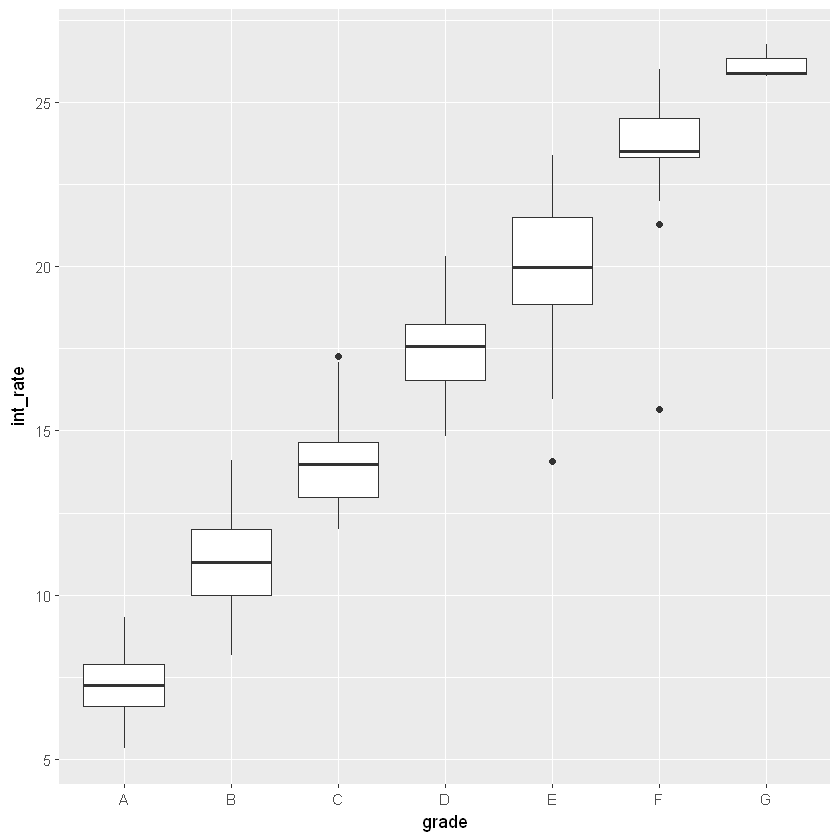

In [82]:
# Make a boxplot of int_rate by grade
ggplot(data = lendingclub, aes(x = grade, y = int_rate)) + geom_boxplot()

In [83]:
# Use aov() to create grade_aov plus call summary() to print results
grade_aov <- aov(int_rate ~ grade, data = lendingclub)

summary(grade_aov)

              Df Sum Sq Mean Sq F value Pr(>F)    
grade          6  27013    4502    2637 <2e-16 ***
Residuals   1493   2549       2                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

You can see from the numeric summary and the boxplot that grade seems to heavily influence interest rate, thus the linear model results indicating that int_rate is significantly different by grade are unsurprising.

### Post-modeling validation plots + variance
In the last exercise we found that int_rate does differ by grade. Now we should validate this model, which for linear regression means examining the Residuals vs. Fitted and Normal Q-Q plots.

If you call plot() on a model object in R, it will automatically plot both of those plots plus two more. You'll interpret these plots to evaluate model fit. We discussed how to do this in the video.

Another assumption of ANOVA and linear modeling is homogeneity of variance. Homogeneity means "same", and here that would mean that the variance of int_rate is the same for each level of grade. We can test for homogeneity of variances using bartlett.test(), which takes a formula and a dataset as inputs.

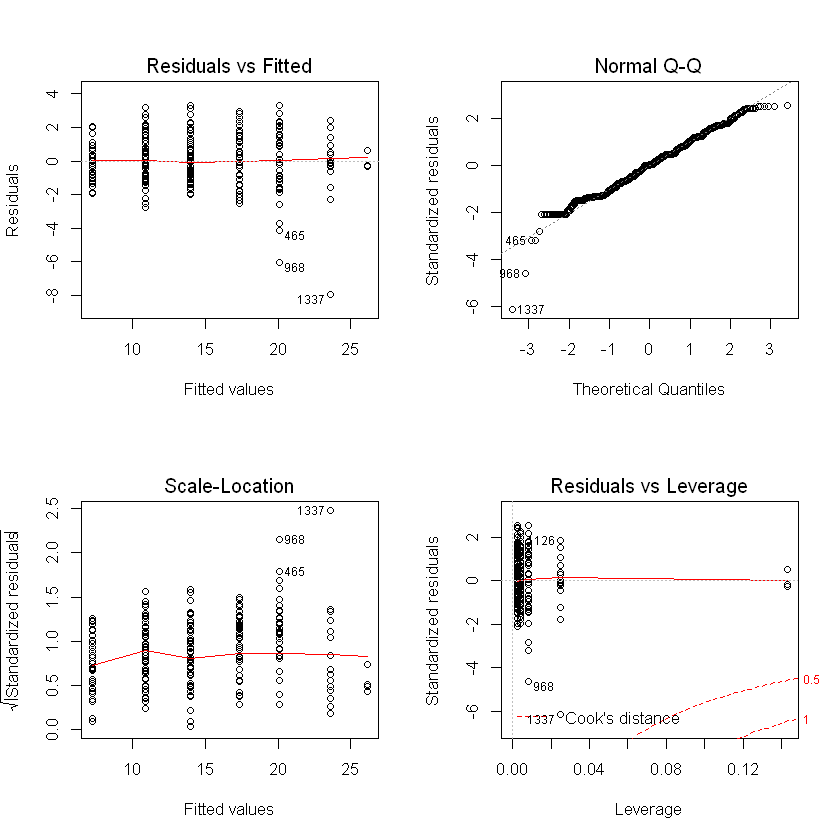

In [84]:
# For a 2x2 grid of plots:
par(mfrow=c(2, 2))

# Plot grade_aov
plot(grade_aov)

The residuals on this model are okay, though the residuals on G have a much smaller range than any other level of grade. The Q-Q plot, however, shows that the residuals are fairly normal.

In [85]:
# Bartlett's test for homogeneity of variance

# H0 = Variance is the same for all treatment groups

bartlett.test(int_rate ~ grade, data = lendingclub)


	Bartlett test of homogeneity of variances

data:  int_rate by grade
Bartlett's K-squared = 78.549, df = 6, p-value = 7.121e-15


### Kruskal-Wallis rank sum test
One non-parametric alternative to ANOVA is the Kruskal-Wallis rank sum test. For those with some statistics knowledge, it is an extension of the Mann-Whitney U test for when there are more than two groups, such as with our grade variable. Don't worry too much about the math behind the test, but know that the null hypothesis for this test, in our case, would be that all of the int_rates have the same ranking, by grade.

The Kruskal-Wallis rank sum test can be conducted using the kruskal.test() function, available in base R. Luckily for you, the use of this function is very similar to using lm() or aov(): you input a formula and a dataset, and a result is returned. We'll utilize it here in the spirit of model validation.

In [86]:
# Conduct the Kruskal-Wallis rank sum test
kruskal.test(int_rate ~ grade, data = lendingclub)


	Kruskal-Wallis rank sum test

data:  int_rate by grade
Kruskal-Wallis chi-squared = 1365.5, df = 6, p-value < 2.2e-16


Results of this test seem to indicate that what we can be confident in our result, which we found across this experiment, that int_rate varies by grade.

## A/B Testing

A/B tests are an incredibly common type of experiment that a data scientist or data analyst might design. A/B tests are often discussed in a marketing context and are very common in marketing related companies, although they're definitely used in other industries as well. One common example of their use is to test customer engagement with different features of a company's website. 

A/B test is a type of controlled experiment with only 2 variants of something: 
- 1 word different in a marketing email
- Red "buy" button on a website vs blue button
- How many consumers click through to create an account based on 2 different website headers?

One important concept that we'll come back to here is power and sample size calculations, as they're pretty crucial in AB testing. Usually, you'll be calculating sample size, given some power and significance level. Then you let your AB test run until you get the sample size you need. You also need to decide an effect size, just as before. You may have guessed by now that an AB test is simply an application of your basic experimental design knowledge, though they can and do get complicated. 

An AB test changes one thing and one thing only and measures the difference in outcome between these 2 alternatives. In this section, we'll design and conduct an AB test with the lending club data we've been using. Say Lending Club was interested to see how the color of the website header affected the loan amount, which is how much an application asks to borrow. 

<img src="images/AB.JPG">

They have a general hypothesis that softer, gentler colors may influence applicants to ask for a lower amount of money, perhaps a more reasonable amount that they can more feasibly pay back. They already use a light blue website header but they've decided to test a second softer, gentler color on the website. Applicants designated Group A were funneled to an application with the light blue existing header while applicants designated Group B were funneled to an application with a new mint green header. We'll examine the amount of money the applicant asked for when applying for the loan based on which colored header they were shown - not a traditional AB test, which often focuses on a metric such as click-through rate, which in this case would be the number of people who applied. 

### Which post-A/B test test?
We'll be testing the mean loan_amnt, which is the requested monetary amount the applicants ask for, based on which color header they saw on the Lending Club website. Which statistical test should we use after we've collected enough data?

#### We'll be looking at the mean difference in amount of loan the applicants asked for, so a t-test is the ticket!

### Sample size for A/B test
We know now that we need to analyze our A/B test results with a t-test after we've collected data. We have two pretty important questions we need to answer before we do any of that: what's the effect size and what's the sample size required for this test?

In this case, effect size was given to us. Lending Club is looking to detect the small effect size of 0.2. We'll bring back the pwr package and calculate sample size using an appropriate function to find out how many we'll need to recruit into each group, A and B.

In [87]:
# Use the function from pwr to find the sample size

pwr.t.test(n = NULL, 
    d = 0.2, 
    sig.level = 0.05, 
    power = 0.8)


     Two-sample t test power calculation 

              n = 393.4057
              d = 0.2
      sig.level = 0.05
          power = 0.8
    alternative = two.sided

NOTE: n is number in *each* group


You can see we only need about 400 people per group to reach our desired power in this A/B test.

### Basic A/B test
Now that we know the sample size required we can analyze our A/B test. Remember that when applicants were using the Lending Club website, they were randomly assigned to two groups, A or B, where A was shown a mint green website header and B was shown a light blue website header. Lending Club was interested to see if website header color choice influenced loan_amnt, the amount an applicant asked to borrow.

A new dataset, lendingclub_ab is available in your workspace. The A/B test was run until there was 500 in each group because of a love of round numbers in the Lending Club staff. Each applicant has been labeled as group A or B. Conduct the proper test to see if the mean of loan_amnt is different between the two groups.

In [88]:
lendingclub_ab <- read.csv("datasets/lendingclub_ab.csv", sep=";")

head(lendingclub_ab)

id,Group,grade,verification_status,loan_amnt
1,A,B,Verified,8000
2,A,B,Not Verified,1200
3,A,C,Not Verified,15000
4,A,B,Verified,9000
5,A,B,Source Verified,16000
6,A,C,Source Verified,15600


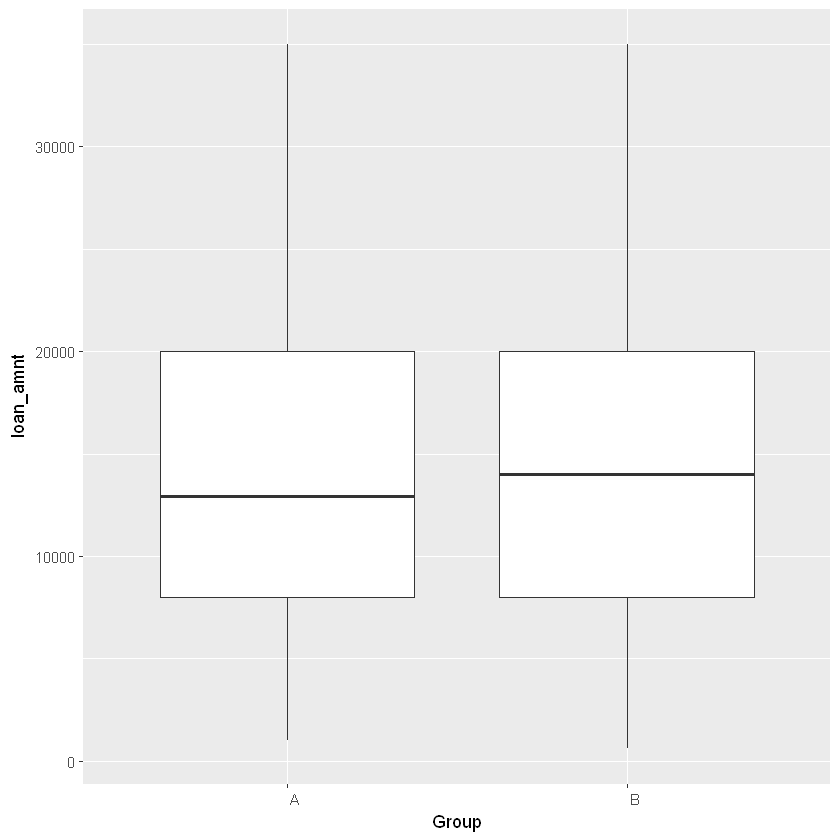

In [89]:
ggplot(lendingclub_ab, aes(x=Group, y=loan_amnt)) + geom_boxplot()

In [90]:
# Conduct a two-sided t-test
t.test(loan_amnt ~ Group, data = lendingclub_ab)


	Welch Two Sample t-test

data:  loan_amnt by Group
t = -0.58112, df = 997.06, p-value = 0.5613
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1377.1748   747.8748
sample estimates:
mean in group      A  mean in group      B  
             14723.15              15037.80 


You can see that there is no compelling evidence to support a difference between groups' means of loan amount, a result which you would use to help make data-driven decisions at Lending Club.

### A/B tests vs. multivariable experiments
The point of an A/B test is that only one thing is changed and the effect of that change is measured. We saw this with our examples in the video and exercises. A multivariate experiment is, instead, like the guinea pig ToothGrowth experiment, where a few things are changed (and is similar to a multiple factor experiment, which we covered earlier in this chapter.)

A Lending Club multivariate test can combine all of the explanatory variables we've looked at in this chapter. Let's examine how Group, grade, and verification_status affect loan_amnt in the lendingclub_ab dataset.

In [91]:
# Build lendingclub_multi
lendingclub_multi <-lm(loan_amnt ~ Group + grade + verification_status, data = lendingclub_ab)

# Examine lendingclub_multi results
tidy(lendingclub_multi)

term,estimate,std.error,statistic,p.value
(Intercept),17143.6708,814.7742,21.0410082,1.574042e-81
Group B,205.1170,515.3487,0.3980159,6.907043e-01
grade B,-974.5360,816.9386,-1.1929122,2.331896e-01
grade C,-631.1408,806.3614,-0.7827021,4.339892e-01
grade D,718.4487,917.4471,0.7830955,4.337583e-01
grade E,1477.4374,1207.9560,1.2230887,2.215872e-01
grade F,5452.8884,1942.2217,2.8075519,5.090026e-03
grade G,3489.7914,3396.3554,1.0275107,3.044310e-01
verification_status Not Verified,-5899.5089,667.5782,-8.8371807,4.405521e-18
verification_status Source Verified,-1371.2411,614.5653,-2.2312374,2.588868e-02


From the results, verification status seems to be the only thing in this model that has a significant effect on loan amount. Let's move on and conduct more multivariable experiments like this.

## Intro to sampling

NHANES dataset = National Health and Nutrition Examination Survey. The participants in NHANES aren't chosen randomly. They're sampled according to a scheme designed to represent the US population. People older than 60, African Americans, and Hispanic individuals are oversampled in the collection. White people made up 60% of the US population at the last census and if they did not oversample these other groups, we wouldn't end up with enough African American and Hispanic individuals to produce reliable statistics on their health. 


We'll discuss probability sampling methods, those where some degree of probability is used to select the sampled units. Non-probability sampling includes things like voluntary responses and convenience sampling, where subjects convenient to the researcher are chosen. 

There are 5 basic types of sampling. 

**Simple Random Sampling (SRS)**: It's the most straightforward. Every unit in a population has an equal probability of being sampled. 

sample()

**Stratified Sampling**: Involves splitting your population by some strata variable, such as race, gender, or type, and taking a simple random sample inside each stratified group. 

dataset %>%
    group_by(strata_variable) %>%
        sample_n()

**Cluster Sampling**: This is where you divide the population into groups called clusters, perhaps every high school in a state. Randomly select some number of those clusters, and sample everyone inside the selected clusters. 

cluster(dataset, cluster_var_name, number_to_select, method = "option")

**Systematic Sampling**: Involves choosing a sample in a systematic way, such as every 5th or 10th or 12th unit of the population. 

**Multi-stage Sampling**: Simply combines one or more of the aforementioned approaches in a logical way.

In [92]:
nhanes_demo <- read.csv("datasets/nhanes_demo.csv")
nhanes_medical <- read.csv("datasets/nhanes_medicalconditions.csv")
nhanes_bodymeasures <- read.csv("datasets/nhanes_bodymeasures.csv")
nhanes_combined <- read.csv("datasets/nhanes_final.csv")

Now that we have the NHANES data assembled, let's get to work on EDA & cleaning.

### NHANES EDA
Let's examine our newly constructed dataset with a mind toward EDA. As in the last chapter, it's a good idea to look at both numerical summary measures and visualizations. These help with understanding data and are a good way to find data cleaning steps you may have missed. 

Say we have access to NHANES patients and want to conduct a study on the effect of being told by a physician to reduce calories/fat in the diet on weight. This is our treatment; we're pretending that instead of this being a question asked of the patient, we randomly had physicians counsel some patients on their nutrition. However, we suspect that there may be a difference in weight based on gender of the patient - a blocking factor!

In [93]:
# weight (bmxwt) 
# Doctor told you to reduce fat/calories (mcq365d)

nhanes_combined %>% 
    group_by(mcq365d) %>% 
    summarise(mean = mean(bmxwt, na.rm = TRUE))

mcq365d,mean
1,90.65094
2,76.49907
9,90.78333
NA,33.54431


Warning message:
"Removed 70 rows containing non-finite values (stat_boxplot)."

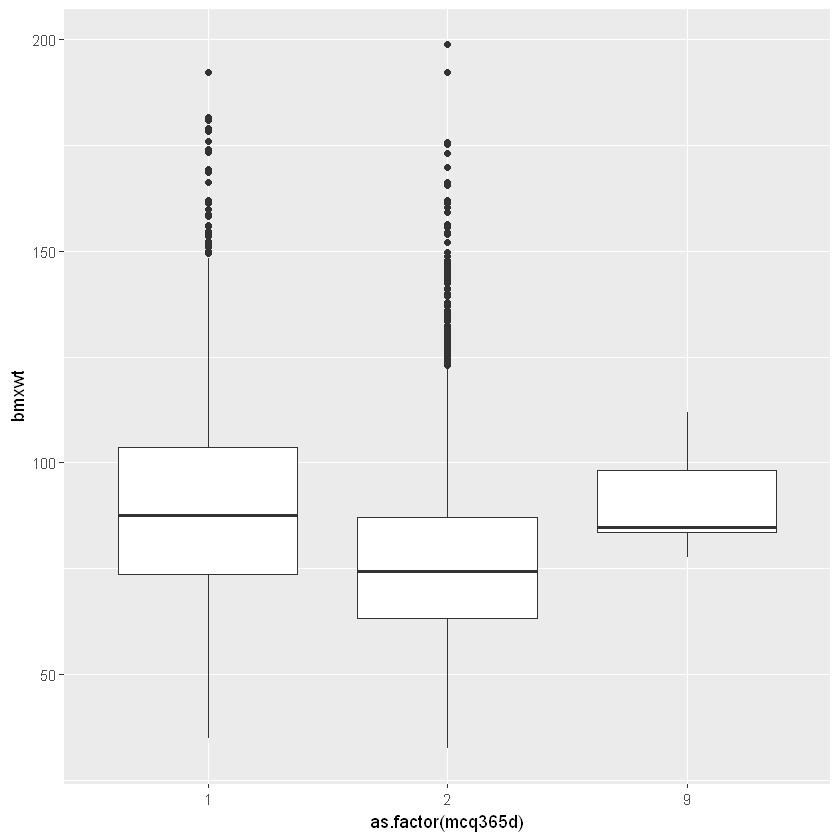

In [94]:
# age (ridageyr)

nhanes_combined %>% filter(ridageyr > 16) %>% 
  ggplot(aes(as.factor(mcq365d), bmxwt)) +
  geom_boxplot()

Now that we have an idea of some of the problems with the data (children weren't given the treatment plus some weights are missing, thus the warning that the boxplot throws) let's do some data cleaning.

### NHANES Data Cleaning
We discovered during data cleaning that no one under the age of 16 was given the treatment (recall that we're pretending the variable about being asked if a doctor has ever advised them to reduce fat or calories in their diet is purposeful nutrition counseling.) Let's eliminate patients < 16 from the dataset.

You also may have noticed that the default settings in ggplot2 delete any observations with a missing dependent variable, in this case, body weight. One option for dealing with the missing weights, imputation, can be implemented using the simputation package. We'll use impute_median(), which takes a dataset and the variable to impute as arguments. If a formula is input, for example length ~ type, it will impute the median value for length by type.

In [95]:
# Filter out anyone less than 16
nhanes_filter <- nhanes_combined %>% 
    filter(ridageyr > 16)

In [96]:
library("simputation")

nhanes_final <- impute_median(nhanes_filter, bmxwt ~ riagendr)

Warning message:
"package 'simputation' was built under R version 3.4.4"

In [97]:
# Recode mcq365d with ifelse() & examine with table()

nhanes_final$mcq365d <- ifelse(nhanes_final$mcq365d == 9, 2, nhanes_final$mcq365d)

table(nhanes_final$mcq365d)


   1    2 
1802 4085 

Now that we have the dataset cleaned, we're ready to learn about RCBDs so we can analyze our experiment.

### Resampling NHANES data
The NHANES data is collected on sampled units (people) specifically selected to represent the U.S. population. Let's briefly disregard that and resample the data. We can conduct a simple random sample using sample(). An example would be: data <- data[sample(nrow(data), N), ], where N is an integer number of how many rows to sample from data.

Stratified sampling can be done with dplyr's group_by() and sample_n(). sample_n() takes as input a dataset and an integer of number of rows to sample.

The sampling package's cluster() creates cluster samples. It takes in a dataset name, the variable in the set to be used as the cluster variable, passed as a vector with the name as a string, e.g. c("variable"), a number of clusters to select, and a method.

In [98]:
# Use sample() to create nhanes_srs

nhanes_srs <- nhanes_final[sample(nrow(nhanes_final), 2500), ]

nrow(nhanes_srs)

[1] 2500

In [99]:
# Create nhanes_stratified with group_by() and sample_n()
nhanes_stratified <- nhanes_final %>%
  group_by(riagendr) %>%
    sample_n(2000)
    
table(nhanes_stratified$riagendr)


   1    2 
2000 2000 

In [100]:
library("sampling")

# household income (indhhin2)

nhanes_cluster <- cluster(nhanes_final, c("indhhin2"), 6, method = "srswor")

table(nhanes_cluster$indhhin2)

Warning message:
"package 'sampling' was built under R version 3.4.4"


  1   3   8  12  15  77 
135 349 470 190 939 119 

## Randomized complete block designs (RCBD)

Previously, we conducted completely randomized experiments. One extension of that type of experiment is the RCBD. 

- **Randomized:** The treatment is assigned randomly inside each block
- **Complete:** Each treatment is used the same number of times in every block
- **Block:** Experimental groups are blocked to be similar (eg. by sex)
- **Design:** This is your experiment!

We utilize blocking in our experiments when we have a "nuisance" factor, something that may affect the outcome of the experiment, but isn't actually of interest to study in the experiment. Blocking allows for the experimental groups to be more similar. We expect groups like those divided by metal hardness, type of crop, or gender, to have minimal differences inside the group, while across the different groups, we expect there to be much larger differences. 

Sometimes, the blocking factor can be thought of not as a nuisance factor, but as something you can control for as an experimenter. There's a saying in experimental design - "Block what you can, randomize what you can't". Essentially, you create blocks with your nuisance variable or variable you can control, and then run your completely randomized experiment inside each block for your desired number of repetitions. 

In most texts or Experimental Design course, the RCBD is demonstrated with an agricultural example. 

<img src="images/RCBD_Workflow.JPG">

Say for instance, you're testing a new fertilizer on your fields. Your outcome will be plant growth. One factor that isn't of terrible interest in this experiment is the type of crop. So you block the fields: one block is corn and one soybean. Then, inside of each block, you conduct a randomized control trial, allocating the fields randomly to either receive the new fertilizer or to use the standard method of growing the crop. Then, you measure the outcome at the specified time points and compare between the groups. Voila - an RCBD!

While we're on the topic of agriculture, let's talk about the agricolae R package. This package enables you to "draw" some of the different experimental designs possible, including an RCBD. 

In [101]:
library("agricolae")

Warning message:
"package 'agricolae' was built under R version 3.4.4"

In [102]:
# treatment
trt <- letters[1:4]

trt 

[1] "a" "b" "c" "d"

In [103]:
rep <- 4

In [104]:
design.rcbd <- design.rcbd(trt, # treatment
                              r = rep, # repetition
                              seed = 42,# random generator seed
                              serie = 0 # how the number blocks are tagged in larger experiments
                          )

In [105]:
# examine the sketch object 
# we can see how our 4 repetition with our 4 treatments can be randomly repeated in each run. 

design.rcbd$sketch

d,c,a,b
b,a,d,c
d,a,b,c
a,b,d,c


### Which is NOT a good blocking factor?
The purpose of blocking an experiment is to make the experimental groups more like one another. Groups are blocked by a variable that is known to introduce variability that will affect the outcome of the experiment, but is not of interest to study in the experiment itself.

A rule of thumb in experimental design is often "block what you can, randomize what you cannot", which means you should aim to block the effects you can control for (e.g. sex) randomize on those you cannot (e.g. smoking status). Variability inside a block is expected to be fairly small, but variability between blocks will be larger.

Which of the following would NOT make a good blocking factor for an experiment?

**When testing the effect of a drug on blood pressure, current pregnancy is used as a blocking factor.**

Current pregnancy is not really something the experimenter can control, and they're also not likely to have enough subjects pregnant to justify blocking by that factor (unless they sampled for pregnant individuals in the first place!)

### Drawing RCBDs with Agricolae
The agricolae package is very helpful when you want to "draw" out the design of an experiment for yourself using R. It can draw many designs, including (of course!) a randomized complete block design.

For the trt object (as well as any time you need sequential letters!), you can use a special built-in object in R to assist you. LETTERS (for capital A-Z) and letters (for lowercase a-z) are very useful, and the letters themselves can be accessed by their indexes (A/a = 1, B/b = 2, etc.)

Let's draw a RCBD design with 5 treatments and 4 repetitions.

In [106]:
# Create designs using apropos(), then print to see possible designs
designs <- ls("package:agricolae", pattern = "design")
print(designs)

 [1] "design.ab"      "design.alpha"   "design.bib"     "design.crd"    
 [5] "design.cyclic"  "design.dau"     "design.graeco"  "design.lattice"
 [9] "design.lsd"     "design.rcbd"    "design.split"   "design.strip"  
[13] "design.youden" 


In [107]:
# Use str() to view design.rcbd's criteria
str(design.rcbd)

List of 3
 $ parameters:List of 7
  ..$ design: chr "rcbd"
  ..$ trt   : chr [1:4] "a" "b" "c" "d"
  ..$ r     : num 4
  ..$ serie : num 0
  ..$ seed  : num 42
  ..$ kinds : chr "Super-Duper"
  ..$       : logi TRUE
 $ sketch    : chr [1:4, 1:4] "d" "b" "d" "a" ...
 $ book      :'data.frame':	16 obs. of  3 variables:
  ..$ plots: num [1:16] 11 12 13 14 21 22 23 24 31 32 ...
  ..$ block: Factor w/ 4 levels "1","2","3","4": 1 1 1 1 2 2 2 2 3 3 ...
  ..$ trt  : Factor w/ 4 levels "a","b","c","d": 4 3 1 2 2 1 4 3 4 1 ...


In [129]:
# Build trt and rep

trt <- LETTERS[1:5]
trt2 <- LETTERS[1:6]

In [130]:
rep <- 4
rep

[1] 4

In [134]:
# Use trt and rep to build my_design_rcbd and view the sketch part of the object
my_design_rcbd <- design.rcbd(trt, r=4, seed = 42, serie=0)
my_design_rcbd$sketch

D,E,A,C,B
B,C,A,E,D
C,D,A,E,B
A,C,B,D,E


In [136]:
my_design_rcbd <- design.rcbd(trt2, r=4, seed = 42, serie=0)
my_design_rcbd$sketch

E,F,B,D,A,C
D,B,F,A,E,C
A,C,B,F,D,E
D,A,C,B,F,E


In [137]:
my_design_rcbd <- design.rcbd(trt, r=5, seed = 42, serie=0)
my_design_rcbd$sketch

D,E,A,C,B
B,C,A,E,D
C,D,A,E,B
A,C,B,D,E
D,C,E,A,B


In [138]:
my_design_rcbd <- design.rcbd(trt2, r=5, seed = 42, serie=0)
my_design_rcbd$sketch

E,F,B,D,A,C
D,B,F,A,E,C
A,C,B,F,D,E
D,A,C,B,F,E
D,B,A,F,C,E


In [139]:
my_design_rcbd <- design.rcbd(trt, r=6, seed = 42, serie=0)
my_design_rcbd$sketch

D,E,A,C,B
B,C,A,E,D
C,D,A,E,B
A,C,B,D,E
D,C,E,A,B
B,A,D,C,E


In [140]:
my_design_rcbd <- design.rcbd(trt2, r=6, seed = 42, serie=0)
my_design_rcbd$sketch

E,F,B,D,A,C
D,B,F,A,E,C
A,C,B,F,D,E
D,A,C,B,F,E
D,B,A,F,C,E
D,A,C,B,F,E


### NHANES RCBD
Recall that our blocked experiment involved a treatment wherein the doctor asks the patient to reduce their fat or calories in their diet, and we're testing the effect this has on weight (bmxwt). We plan to block by gender, which in the NHANES dataset is stored in riagendr.

To block an experiment, use a formula along the lines of outcome ~ treatment + blocking_factor in the appropriate modeling function.

In [111]:
# Make nhanes_final$riagendr a factor variable
nhanes_final$riagendr <- as.factor(nhanes_final$riagendr)

In [112]:
# Use aov() to create nhanes_rcbd

# bmxwt = weight = outcome
# mcq365d = Doctor told you to reduce fat/calories = treatment
# riagendr = gender = blocking factor

nhanes_rcbd <- aov(bmxwt ~ mcq365d + riagendr, data = nhanes_final)

# Check the results of nhanes_rcbd with summary()
summary(nhanes_rcbd)

              Df  Sum Sq Mean Sq F value Pr(>F)    
mcq365d        1  228651  228651   568.8 <2e-16 ***
riagendr       1  159706  159706   397.3 <2e-16 ***
Residuals   5884 2365187     402                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

In [113]:
# Print the difference in weights by mcq365d and riagendr
nhanes_final %>% 
    group_by(mcq365d, riagendr) %>% 
    summarise(mean_wt = mean(bmxwt))

mcq365d,riagendr,mean_wt
1,1,95.07812
1,2,86.67372
2,1,82.62991
2,2,71.31000


It's pretty clear that there truly is a mean difference in weight by gender. Now that we have the RCBD down, let's tackle Balanced Incomplete Block Designs (BIBD).

### RCBD Model Validation
It's a good idea to validate the results. We'll examine the Residuals vs. Fitted and Normal Q-Q plots, though now we'll only see a Constant Leverage plot in place of the other two. A good model has a Q-Q plot showing an approximately normal distribution and no clear patterns across blocks or treatments in the others.

We can also look at Interaction plots. We hope to see parallel lines, no matter which of the block or the treatment is on the x-axis. If they are, they satisfy a key assumption of the RCBD model called Additivity.

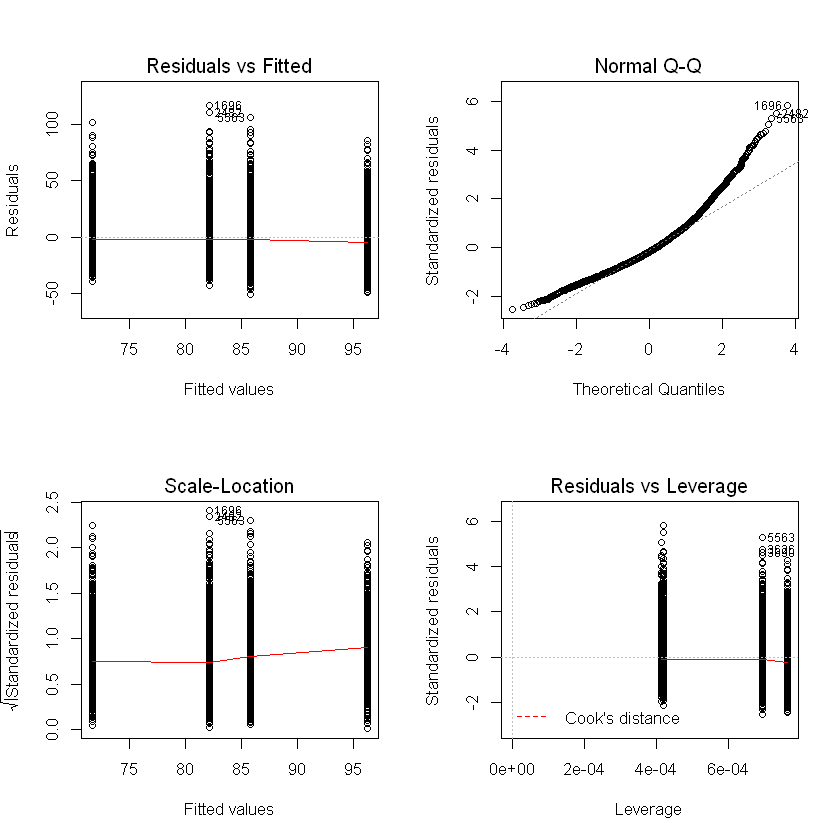

In [114]:
# For a 2x2 grid of plots:
par(mfrow=c(2, 2))

# Plot nhanes_rcbd
plot(nhanes_rcbd)

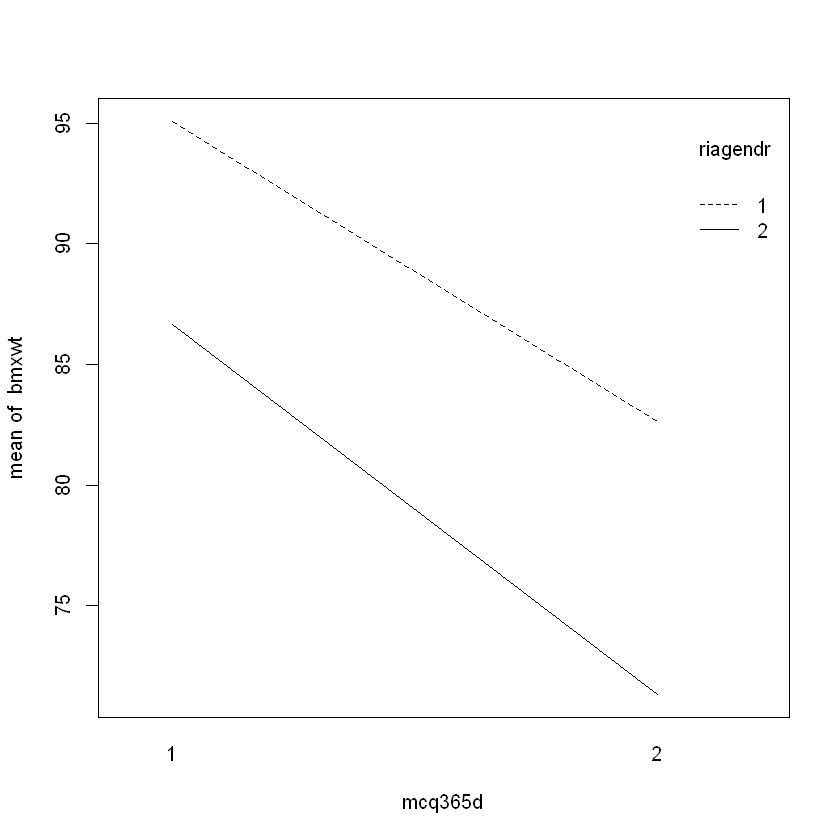

In [115]:
#  view the interaction plot between the treatment and gender and observe if the lines are parallel.
with(nhanes_final, interaction.plot(mcq365d, riagendr, bmxwt))

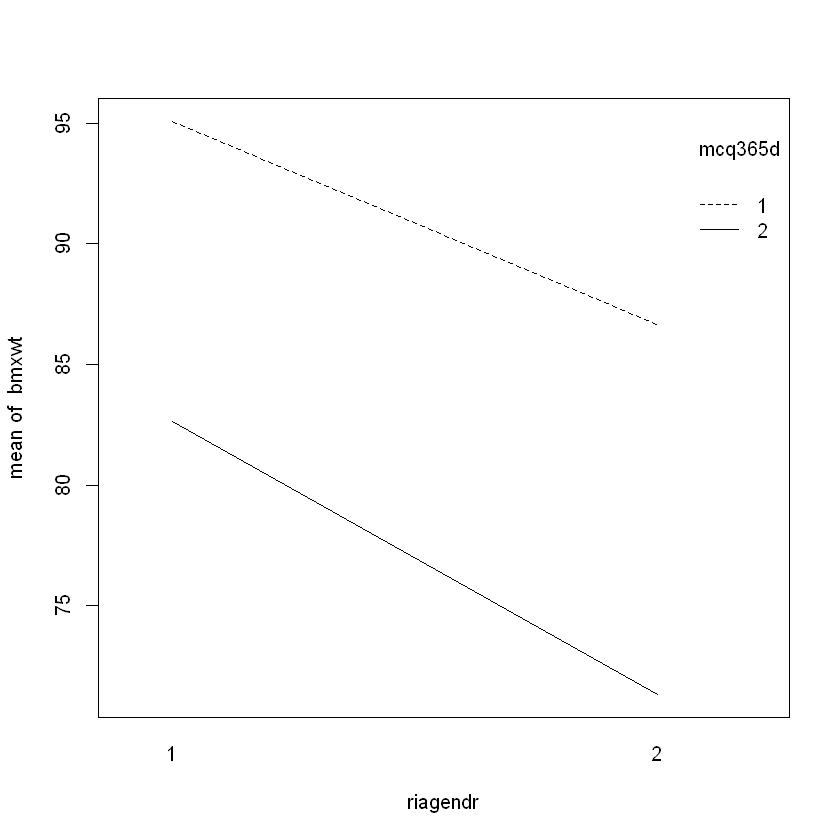

In [116]:
# view the interaction plot between gender and 
# the treatment and observe if the lines are parallel.

with(nhanes_final, interaction.plot(riagendr, mcq365d, bmxwt))

The plots show that this model is pretty good, and the interaction plots seem to agree.

## Balanced Incomplete Block Designs (BIBD)


We covered randomized complete block designs, which was a completely randomized experiment executed inside each block in order to control for a "nuisance" factor that you're not interested in studying. 

But what about when you can't fit each treatment in a block? That's an incomplete block design. Sometimes it will not be feasible, advisable, or even necessary to test every treatment in each block. In that case, you can possibly build a Balanced Incomplete Block Design (BIBD)

* **Balanced:** Each pair of treatments occur together in a block an equal number of times

* **Incomplete:** Not every treatment will appear in every block

* **Block:** Experimental groups are blocked to be similar (eg. by sex)

* **Design:** This is your experiment!

Incomplete block designs do exist and lack the "balance" in each pair of treatments occuring an equal number of times across the eperiment. (Not covered here but it is possible!)

A BIBD (Balanced Incomplete Block Design) isn't always possible, however. You could wing it and plug numbers in and out of the design_bib() function in agricolae. 

### Is there a BIBD?

- t = # of treatments
- k = # of treatments per block (# of factor levels of our blocking variable)
- r = the desired # of replications of our experiment

To find out if BIBD is even possible, you can calculate lambda using this formula:

<img src="images/BIBD_Possible.JPG">

Replications times the number of Block Factors minus one, divided by the number of Treatments minus one. 

If lambda is a whole number, there is BIBD possible. And if not, there simply isn't one for the given t, k, and r. 

Say we only have the money for 2 treatments per block (k) out of 4 total treatments (t). That is, 4 blocks and 2 full replications of the experiment. Even though this may look fully balanced, when you calculate lambda, you quickly see that it equals 2/3 and not a whole number. 

<img src="images/BIBD_Possible_1.JPG">

A BIBD isn't possible here; you would need to add more replications of the experiment or a larger block size. In the image version, we can check to see if each pair of treatment occurs in a balanced way. 

<img src="images/BIBD_Invalid.JPG">

Right away, we can see that AB occurs only once in the first column. The pair AC never occurs in a block. Either one of these methods will tell you this is not a valid BIBD, although calculating the lambda is certainly quicker. 

In the case of a second example, where there are 4 treatments (t) and you intend to do 3 treatments per block (k), with 3 full replications (r), we get a lambda of 2. This BIBD is a go! YAY!

<img src="images/BIBD_Possible_2.JPG">

Again, we can look at the image to verify that each pair of treatments occurs together twice across the entire experiment. 

<img src="images/BIBD_Valid.JPG">

Let's find the number of occurrences of AB, for example. Columns are our blocking factor,so we're checking for pairs column-wise. We see AB in the 1st and 2nd columns only. AC occurs in the 2nd and 3rd columns only. If we continued, this would hold true for all pairs of treatments in this study. 